In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# imports
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
from time import time
from scipy import stats
import json

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
application_data = pd.read_csv('application_data.csv',sep='\t')
loan_performance = pd.read_csv('loan_performance.csv',sep='\t')

In [5]:
application_data

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,payment_frequency,home_phone_type,other_phone_type,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money
0,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,...,Semi-monthly,Mobile,NaN,Other,1560,614,574,600,656,561
1,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,...,Bi-weekly,Mobile,NaN,Other,900,708,501,550,651,563
2,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,...,Bi-weekly,Mobile,NaN,Other,1434,687,522,561,661,598
3,49fb42f51d,500,9/10/76,Approved,False,785,False,10/18/10 7:05,4,True,...,Bi-weekly,Mobile,NaN,Other,1600,616,560,552,634,591
4,195fbe5739,300,12/1/79,Approved,True,700,True,10/19/10 10:58,4,True,...,Bi-weekly,Mobile,Home,Other,1360,681,603,654,659,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0aeed95009,300,10/15/81,Approved,True,0,True,4/16/11 18:45,3,True,...,Semi-monthly,Mobile,Work,Other,1600,616,583,591,680,622
643,755f6707c9,800,3/6/46,Approved,True,529,True,4/16/11 21:48,8,True,...,Monthly,Mobile,Work,Other,2050,583,612,649,659,628
644,9e9ca8f361,800,5/25/76,Approved,True,900,True,4/17/11 11:24,8,True,...,Bi-weekly,Mobile,NaN,Bills (Home / Utilities),3626,573,543,556,657,588
645,0f7b7c2c37,500,6/9/60,Approved,True,650,True,4/17/11 12:06,5,True,...,Semi-monthly,Mobile,Work,Bills (General),1800,329,571,616,650,618


In [6]:
application_data.columns

Index(['customer_id', 'amount_requested', 'birth_date', 'status',
       'residence_rent_or_own', 'monthly_rent_amount',
       'bank_account_direct_deposit', 'application_when', 'loan_duration',
       'payment_ach', 'num_payments', 'payment_amount', 'amount_approved',
       'duration_approved', 'payment_amount_approved', 'address_zip', 'email',
       'bank_routing_number', 'email_duration', 'residence_duration',
       'bank_account_duration', 'payment_frequency', 'home_phone_type',
       'other_phone_type', 'how_use_money', 'monthly_income_amount',
       'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail',
       'raw_FICO_bank_card', 'raw_FICO_money'],
      dtype='object')

In [10]:
loan_performance['idLoan']

0       0DBA6B011D-01
1       96ACBBA7ED-01
2       289421D82A-01
3       9ECE67D6C5-01
4       5C2C402094-01
            ...      
1280    2AC47A61E0-02
1281    6083264819-01
1282    F662A12C25-01
1283    42B0FB0E51-01
1284    FC6F1F5DD6-01
Name: idLoan, Length: 1285, dtype: object

In [34]:
application_data.loc[application_data['loan_duration'] != application_data['duration_approved'], ['loan_duration', 'duration_approved']]

,loan_duration,duration_approved
23,8,6
38,8,6
46,8,6
56,8,6
57,8,6
...,...,...
625,8,6
630,8,6
639,8,6
640,8,6


In [654]:
loan_performance2.head()

,idLoan,flgGood
0,0DBA6B011D-01,Bad
1,96ACBBA7ED-01,Bad
2,289421D82A-01,Bad
3,9ECE67D6C5-01,Good
4,5C2C402094-01,Bad


In [653]:
loan_performance2 = pd.read_csv('loan_performance.csv',sep='\t')

 Questions:
 - Residence rent or own: What is that column? Because even if its true or False there are values in monthly rent amount.
- Bank accnt direct deposit; is it just if direct deposit enabled in bank? 
- Loan duration: Is it in weeks or months?
- What is payment ach flag?
- Number of payments and payment amount, what is this? If lets say they are 6 and 138, does it mean the customer has to pay 138 dollars 6 times within the loan duration?
- Difference between loan duration and duration approved? Some rows have different values 
- Payment amount approved, how is it different from payment_amount? Is payment_amount the actual (that is they have done actual payents, if so how many times (loan duration or duration approved)? 
- Payment amount approved is also null in many cases, but they have payment_amount columns. Why this so?
- Are the last 5 columns simply score? I read about them that they are some types of credit score. Why 5 scores?
- How are you classifying a loan to be bad? Example, when I looked at F51A0A7F1E customer, his number of payments is 13, payment amount is 46.3, payment amount approved is 40. So doing 46.43*13 = 600 is greater than amount approved (500)

## Exploratory Data Analysis

We have 674 customers who have applied, and we have their corresponding loan classifications.
But we have extra customers in loan classification.

In [4]:
loan_performance['customer_id'] = loan_performance['idLoan'].str.lower()
loan_performance['customer_id'] = loan_performance['customer_id'].str[:10]

In [7]:
loan_performance['customer_id'].unique().shape

(1269,)

In [8]:
application_data['customer_id'].unique().shape

(647,)

In [5]:
#Getting into sets for counts and checking overlap
loan_performance_customers = set(loan_performance['customer_id'].astype(str).unique())
application_data_customers = set(application_data['customer_id'].astype(str).unique())

In [7]:
#These many customers don't have application information
len(loan_performance_customers - application_data_customers)

629

In [8]:
#These many customers have overlap
len(loan_performance_customers & application_data_customers)

640

In [9]:
#These customers have applications but their loans not classified
application_data_customers - loan_performance_customers

{'2.10E+90',
 '4.13E+13',
 '689b7958a2',
 '7752f74e8c',
 '805206719d',
 '902431691',
 'e2ef95a963'}

Checking counts of loan performances

In [10]:
loan_performance.groupby(['flgGood']).size()

flgGood
Bad     516
Good    769
dtype: int64

In [6]:
one_hot_classification = pd.get_dummies(loan_performance['flgGood'])

In [7]:
loan_performance = pd.concat([loan_performance,one_hot_classification], axis = 1)

In [12]:
loan_performance

,idLoan,flgGood,customer_id,Bad,Good
0,0DBA6B011D-01,Bad,0dba6b011d,1,0
1,96ACBBA7ED-01,Bad,96acbba7ed,1,0
2,289421D82A-01,Bad,289421d82a,1,0
3,9ECE67D6C5-01,Good,9ece67d6c5,0,1
4,5C2C402094-01,Bad,5c2c402094,1,0
...,...,...,...,...,...
1280,2AC47A61E0-02,Good,2ac47a61e0,0,1
1281,6083264819-01,Good,6083264819,0,1
1282,F662A12C25-01,Good,f662a12c25,0,1
1283,42B0FB0E51-01,Good,42b0fb0e51,0,1


In [8]:
#We can simply classify customers who have even a single bad loan as bad
customer_classification = loan_performance.groupby(['customer_id']).agg({'Bad':max}).reset_index()

In [14]:
customer_classification

,customer_id,Bad
0,001110273b,1
1,00413198e8,1
2,0089b143c9,0
3,00b5dc96d2,1
4,00b8adfe83,1
...,...,...
1264,fee0820728,0
1265,ff0c12e4fe,0
1266,ff206e08ad,1
1267,ffcd94db5a,0


Checking for customers who are in application data

In [9]:
final_customer_classification = customer_classification[customer_classification['customer_id'].
                                                        isin(list(application_data_customers))]
final_customer_classification.index = range(final_customer_classification.shape[0])

In [10]:
final_customer_classification

,customer_id,Bad
0,00b5dc96d2,1
1,00b8adfe83,1
2,021b03f1b5,0
3,02309382cf,0
4,031247ab75,0
...,...,...
635,fd15ed8523,0
636,fdad7630df,1
637,fe7542440a,1
638,ff206e08ad,1


Above is our y variable

In [19]:
final_customer_classification['Bad'].value_counts()

1    354
0    286
Name: Bad, dtype: int64

In [11]:
application_data = application_data.merge(final_customer_classification, on = ['customer_id'], how = 'left')

In [12]:
application_data

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,home_phone_type,other_phone_type,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,Bad
0,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,...,Mobile,NaN,Other,1560,614,574,600,656,561,0.0
1,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,...,Mobile,NaN,Other,900,708,501,550,651,563,1.0
2,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,...,Mobile,NaN,Other,1434,687,522,561,661,598,0.0
3,49fb42f51d,500,9/10/76,Approved,False,785,False,10/18/10 7:05,4,True,...,Mobile,NaN,Other,1600,616,560,552,634,591,1.0
4,195fbe5739,300,12/1/79,Approved,True,700,True,10/19/10 10:58,4,True,...,Mobile,Home,Other,1360,681,603,654,659,636,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0aeed95009,300,10/15/81,Approved,True,0,True,4/16/11 18:45,3,True,...,Mobile,Work,Other,1600,616,583,591,680,622,1.0
643,755f6707c9,800,3/6/46,Approved,True,529,True,4/16/11 21:48,8,True,...,Mobile,Work,Other,2050,583,612,649,659,628,0.0
644,9e9ca8f361,800,5/25/76,Approved,True,900,True,4/17/11 11:24,8,True,...,Mobile,NaN,Bills (Home / Utilities),3626,573,543,556,657,588,0.0
645,0f7b7c2c37,500,6/9/60,Approved,True,650,True,4/17/11 12:06,5,True,...,Mobile,Work,Bills (General),1800,329,571,616,650,618,1.0


<b> NaN Analysis </b>

In [135]:
application_data.isnull().sum()

customer_id                      0
amount_requested                 0
birth_date                       0
status                           0
residence_rent_or_own            0
monthly_rent_amount              0
bank_account_direct_deposit      0
application_when                 0
loan_duration                    0
payment_ach                      0
num_payments                     0
payment_amount                   0
amount_approved                  0
duration_approved                0
payment_amount_approved         20
address_zip                      0
email                            0
bank_routing_number              0
email_duration                   0
residence_duration               0
bank_account_duration            1
payment_frequency                0
home_phone_type                  0
other_phone_type               285
how_use_money                    2
monthly_income_amount            0
raw_l2c_score                    0
raw_FICO_telecom                 0
raw_FICO_retail     

Bivariate graph of missing value payment_aount_approved, to see if anything specific with this feature.
Nothing found.

<b> Although let's create variable Age and check just in case</b>

<AxesSubplot:>

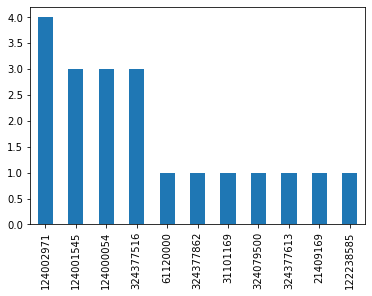

In [230]:
#application_data.loc[application_data['payment_amount_approved'].isna(),['raw_FICO_money']].hist()
application_data[application_data['payment_amount_approved'].isna()]['bank_routing_number'].value_counts().plot(kind='bar')




<AxesSubplot:>

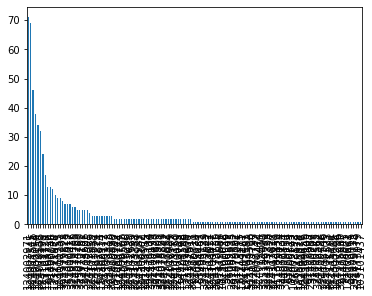

In [231]:
#application_data.loc[~application_data['payment_amount_approved'].isna(),['raw_FICO_money']].hist()
application_data[~application_data['payment_amount_approved'].isna()]['bank_routing_number'].value_counts().plot(kind='bar')



In [195]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  647 non-null    object 
 1   amount_requested             647 non-null    int64  
 2   birth_date                   647 non-null    object 
 3   status                       647 non-null    object 
 4   residence_rent_or_own        647 non-null    bool   
 5   monthly_rent_amount          647 non-null    int64  
 6   bank_account_direct_deposit  647 non-null    bool   
 7   application_when             647 non-null    object 
 8   loan_duration                647 non-null    int64  
 9   payment_ach                  647 non-null    bool   
 10  num_payments                 647 non-null    int64  
 11  payment_amount               647 non-null    float64
 12  amount_approved              647 non-null    int64  
 13  duration_approved   

In [210]:
pd.to_datetime(application_data['application_when'])

0     2010-10-16 14:06:00
1     2010-10-17 13:01:00
2     2010-10-17 19:52:00
3     2010-10-18 07:05:00
4     2010-10-19 10:58:00
              ...        
642   2011-04-16 18:45:00
643   2011-04-16 21:48:00
644   2011-04-17 11:24:00
645   2011-04-17 12:06:00
646   2011-04-17 21:15:00
Name: application_when, Length: 647, dtype: datetime64[ns]

In [216]:
pd.to_datetime(application_data['birth_date']).dt.year

0      1991
1      1990
2      1980
3      1976
4      1979
       ... 
642    1981
643    2046
644    1976
645    2060
646    2057
Name: birth_date, Length: 647, dtype: int64

In [212]:
application_data['birth_date']

0       8/21/91
1       7/24/90
2       9/13/80
3       9/10/76
4       12/1/79
         ...   
642    10/15/81
643      3/6/46
644     5/25/76
645      6/9/60
646      5/6/57
Name: birth_date, Length: 647, dtype: object

In [13]:
application_data['age_years'] = pd.to_datetime(application_data['application_when']).dt.year - pd.to_datetime(application_data['birth_date']).dt.year




In [22]:
application_data['age_years']

0      19
1      20
2      30
3      34
4      31
       ..
642    30
643   -35
644    35
645   -49
646   -46
Name: age_years, Length: 647, dtype: int64

In [14]:
#Correcting the age
application_data['age_years'] = application_data['age_years'].apply(lambda x: x if x>0 else x+100)

In [ ]:
#Analysis on age vs NaN value

array([[<AxesSubplot:title={'center':'age_years'}>]], dtype=object)

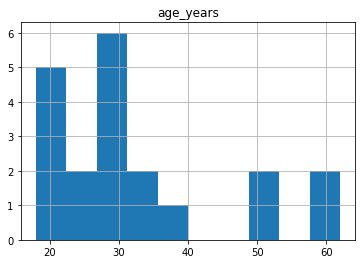

In [15]:
application_data.loc[application_data['payment_amount_approved'].isna(),['age_years']].hist()

array([[<AxesSubplot:title={'center':'age_years'}>]], dtype=object)

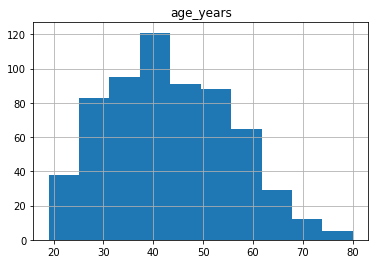

In [16]:
application_data.loc[~application_data['payment_amount_approved'].isna(),['age_years']].hist()

There is no direct reason for NaN values for payment_amount_approved.

In [26]:
#Not that imp
application_data['payment_ach'].value_counts()

True     646
False      1
Name: payment_ach, dtype: int64

In [234]:
#Features which we definitely want to analyze
#amount_requested and amount_approved
#age_years
#residence_rent_or_own
#monthly_rent_amount
#bank_account_direct_deposit
#loan_duration and duration_approved
#num_payments and payment_frequency
#payment_amount and payment_amount_approved
#residence_duration
#bank_account_duration
#email_duration just in case
#how_use_money
#monthly_income_amount
#All 5 score columns (most important maybe, may need binning)
application_data.columns

Index(['customer_id', 'amount_requested', 'birth_date', 'status',
       'residence_rent_or_own', 'monthly_rent_amount',
       'bank_account_direct_deposit', 'application_when', 'loan_duration',
       'payment_ach', 'num_payments', 'payment_amount', 'amount_approved',
       'duration_approved', 'payment_amount_approved', 'address_zip', 'email',
       'bank_routing_number', 'email_duration', 'residence_duration',
       'bank_account_duration', 'payment_frequency', 'home_phone_type',
       'other_phone_type', 'how_use_money', 'monthly_income_amount',
       'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail',
       'raw_FICO_bank_card', 'raw_FICO_money', 'Bad', 'age_years'],
      dtype='object')

In [17]:
#Dropping rows where classification not present
application_data = application_data[~application_data['Bad'].isna()]

In [18]:
application_data.describe()


,amount_requested,monthly_rent_amount,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,address_zip,bank_routing_number,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,Bad,age_years
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.00000,640.000000,620.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.00000
mean,598.203125,582.354687,5.932812,10.290625,116.301172,525.62500,5.546875,113.017694,81537.504687,1.814962e+08,2616.026563,594.071875,568.725000,596.689062,665.020313,602.990625,0.553125,42.74375
std,167.931508,437.336365,1.564528,4.201860,56.711956,131.35117,1.217114,56.276080,7805.614039,9.912813e+07,1712.436920,122.806977,42.897658,52.235310,40.020862,27.810389,0.497559,12.38354
min,250.000000,0.000000,2.000000,3.000000,35.210000,250.00000,2.000000,31.500000,57003.000000,1.240000e+04,300.000000,50.000000,222.000000,222.000000,222.000000,222.000000,0.000000,18.00000
25%,500.000000,261.250000,5.000000,6.000000,77.390000,500.00000,5.000000,77.390000,83704.000000,1.240001e+08,1503.000000,539.750000,537.000000,556.000000,645.000000,587.750000,0.000000,33.00000
50%,500.000000,550.000000,5.000000,10.000000,92.170000,500.00000,5.000000,92.170000,84065.000000,1.240030e+08,2245.000000,589.000000,568.000000,594.000000,670.500000,605.000000,1.000000,42.00000
75%,800.000000,826.000000,8.000000,13.000000,144.850000,500.00000,6.000000,140.072500,84119.000000,3.240795e+08,3200.000000,668.250000,597.000000,638.000000,680.000000,620.000000,1.000000,52.00000
max,800.000000,3018.000000,8.000000,34.000000,455.500000,800.00000,8.000000,455.500000,84790.000000,5.113005e+08,19392.000000,808.000000,712.000000,756.000000,797.000000,662.000000,1.000000,80.00000


<br><b>monthly_income_amount</b> seems to be having some <b>strong outliers</b>. </br>
<br>monthly_rent_amount may have some as well.</br>

<AxesSubplot:>

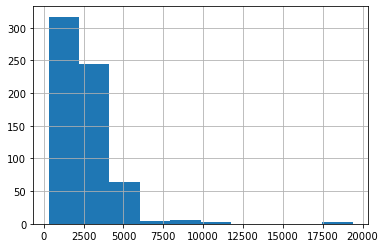

In [19]:
application_data['monthly_income_amount'].hist()

In [270]:
#Mean + 3 std
2616 + 3*1712


7752

In [20]:
application_data[application_data['monthly_income_amount'] > 7500]

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,other_phone_type,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,Bad,age_years
17,6a0eee2c2f,500,12/4/81,Approved,True,750,True,11/1/10 11:39,6,True,...,NaN,Other,9000,537,592,644,667,630,1.0,29
121,f52446dd8f,500,6/16/45,Approved,False,1714,False,12/20/10 9:42,4,True,...,NaN,Other,10000,536,627,660,705,662,0.0,65
140,eafb0e1828,800,4/13/63,Approved,True,325,True,12/23/10 14:50,8,True,...,NaN,Other,19392,478,576,586,680,631,1.0,47
212,85c245983d,800,5/29/73,Approved,True,0,False,1/19/11 13:12,6,True,...,Home,Other,8000,612,568,598,680,612,1.0,38
224,1aecb0e33e,500,12/3/69,Approved,True,200,True,1/22/11 13:37,5,True,...,Home,Other,8000,541,588,623,661,610,0.0,42
301,d758a589d6,500,1/13/66,Approved,False,800,False,2/8/11 15:22,8,True,...,NaN,Other,8100,563,599,578,680,630,0.0,45
359,684bea73ab,700,7/28/67,Approved,True,700,True,2/21/11 15:13,6,True,...,NaN,Other,9644,521,576,601,650,619,1.0,44
417,4ad60935b0,300,2/28/66,Approved,False,1100,False,3/8/11 16:16,5,True,...,Work,Bills (General),7600,765,601,641,671,627,1.0,45
478,f9891e0e6a,800,7/6/79,Approved,True,1200,True,3/21/11 10:03,3,True,...,NaN,Other,11000,572,595,639,659,635,1.0,32
575,57de857d10,500,3/31/52,Approved,False,3018,True,4/5/11 13:49,4,True,...,NaN,Other,9666,616,650,675,733,647,0.0,59


These are clear outliers need to be handled. We can do clipping (if monthly income > 7500, make it to 7500

In [21]:
application_data.loc[application_data['monthly_income_amount'] > 7500, 'monthly_income_amount'] = 7500

## Correlation

In [22]:
corr_mat = round(application_data.corr(),2)
corr_mat
#num_payments and payment_amount
#num_payments and payment_amount_approved
#amount_requested and amount_approved
#duration_approved and loan_duration
#payment_amount and payment_amount_approved
#All FICO scores correlated to each other (not raw l2c score)

,amount_requested,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,loan_duration,payment_ach,num_payments,payment_amount,amount_approved,duration_approved,...,address_zip,bank_routing_number,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,Bad,age_years
amount_requested,1.00,0.01,0.10,0.02,0.46,-0.00,0.23,0.24,0.70,0.39,...,0.20,0.10,0.16,0.01,0.03,0.01,-0.01,0.04,0.04,0.04
residence_rent_or_own,0.01,1.00,-0.20,-0.03,0.04,-0.03,0.10,-0.13,-0.08,-0.01,...,0.04,-0.00,-0.15,0.00,-0.18,-0.13,-0.19,-0.25,0.10,-0.31
monthly_rent_amount,0.10,-0.20,1.00,0.07,-0.07,-0.00,-0.00,0.09,0.16,-0.03,...,0.04,0.04,0.49,0.05,0.20,0.09,0.10,0.20,-0.03,0.12
bank_account_direct_deposit,0.02,-0.03,0.07,1.00,-0.03,0.08,-0.00,0.03,0.04,-0.01,...,-0.01,0.08,0.02,-0.02,0.03,0.01,0.01,0.03,-0.07,0.08
loan_duration,0.46,0.04,-0.07,-0.03,1.00,-0.00,0.41,-0.12,0.29,0.87,...,0.12,0.05,-0.05,-0.04,-0.01,-0.01,-0.02,-0.00,-0.01,0.02
payment_ach,-0.00,-0.03,-0.00,0.08,-0.00,1.00,0.04,-0.04,0.01,-0.01,...,-0.01,0.02,0.00,0.01,0.02,0.03,0.00,-0.01,-0.04,0.02
num_payments,0.23,0.10,-0.00,-0.00,0.41,0.04,1.00,-0.67,0.24,0.46,...,0.09,0.02,-0.01,0.03,-0.09,-0.09,-0.12,-0.11,0.10,-0.21
payment_amount,0.24,-0.13,0.09,0.03,-0.12,-0.04,-0.67,1.00,0.40,-0.05,...,0.03,0.05,0.11,0.03,0.18,0.16,0.18,0.22,-0.15,0.30
amount_approved,0.70,-0.08,0.16,0.04,0.29,0.01,0.24,0.40,1.00,0.46,...,0.12,0.07,0.19,0.09,0.19,0.15,0.13,0.22,-0.04,0.10
duration_approved,0.39,-0.01,-0.03,-0.01,0.87,-0.01,0.46,-0.05,0.46,1.00,...,0.08,0.07,-0.01,0.01,0.08,0.05,0.07,0.10,-0.04,0.06


In [247]:
for column in corr_mat:
    print('Column: ' + column)
    print(list(corr_mat[corr_mat[column].abs() > 0.6].index))

Column: amount_requested
['amount_requested', 'amount_approved']
Column: residence_rent_or_own
['residence_rent_or_own']
Column: monthly_rent_amount
['monthly_rent_amount']
Column: bank_account_direct_deposit
['bank_account_direct_deposit']
Column: loan_duration
['loan_duration', 'duration_approved']
Column: payment_ach
['payment_ach']
Column: num_payments
['num_payments', 'payment_amount', 'payment_amount_approved']
Column: payment_amount
['num_payments', 'payment_amount', 'payment_amount_approved']
Column: amount_approved
['amount_requested', 'amount_approved']
Column: duration_approved
['loan_duration', 'duration_approved']
Column: payment_amount_approved
['num_payments', 'payment_amount', 'payment_amount_approved']
Column: address_zip
['address_zip']
Column: bank_routing_number
['bank_routing_number']
Column: monthly_income_amount
['monthly_income_amount']
Column: raw_l2c_score
['raw_l2c_score']
Column: raw_FICO_telecom
['raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card', 

## Numeric features vs target variable Analysis

This is going to be Boxplots and Anova test to get an idea.

Column: amount_requested
F_onewayResult(statistic=0.9754325568880706, pvalue=0.3237034443994946)
Column: age_years
F_onewayResult(statistic=14.772261735243504, pvalue=0.00013345030802739191)
Column: monthly_rent_amount
F_onewayResult(statistic=0.42476078128227984, pvalue=0.5148057167748349)
Column: num_payments
F_onewayResult(statistic=6.9944579798949995, pvalue=0.008377469604387048)
Column: payment_amount
F_onewayResult(statistic=13.891167053255604, pvalue=0.00021090400238408944)
Column: loan_duration
F_onewayResult(statistic=0.13427745720809686, pvalue=0.7141590939543518)
Column: monthly_income_amount
F_onewayResult(statistic=1.1134974459733387, pvalue=0.29172236962574294)
Column: raw_l2c_score
F_onewayResult(statistic=0.1082520412407294, pvalue=0.7422509785661999)
Column: raw_FICO_telecom
F_onewayResult(statistic=15.852146973470795, pvalue=7.63670148003645e-05)
Column: raw_FICO_retail
F_onewayResult(statistic=21.996883824343165, pvalue=3.342301248238557e-06)
Column: raw_FICO_bank_ca

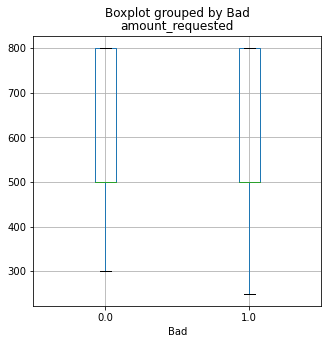

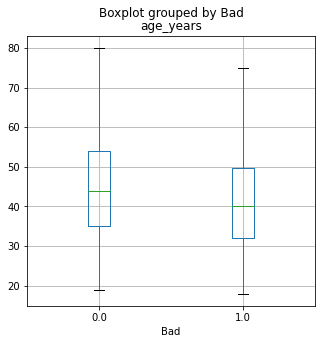

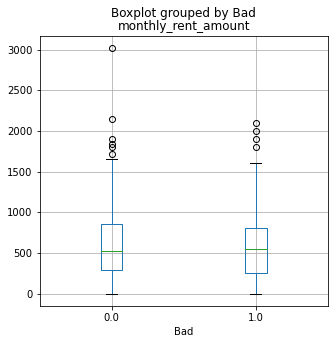

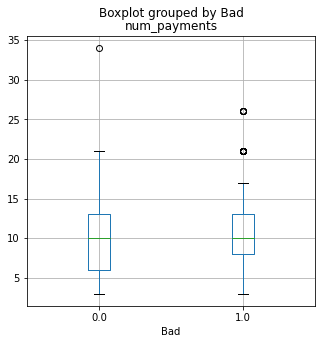

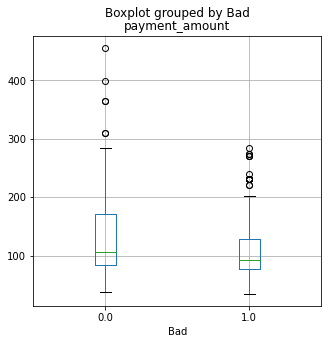

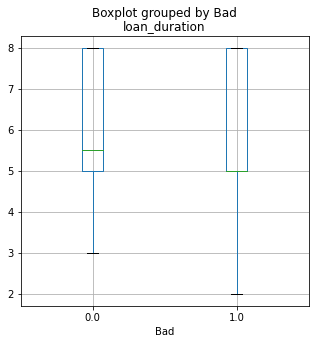

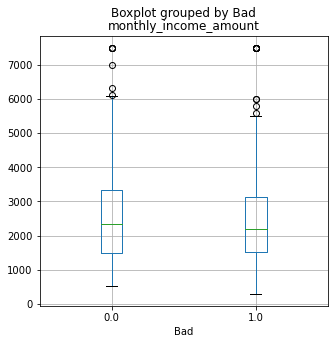

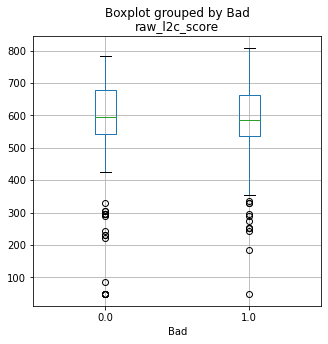

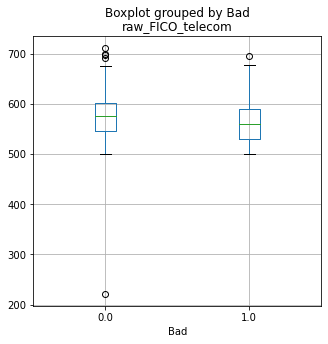

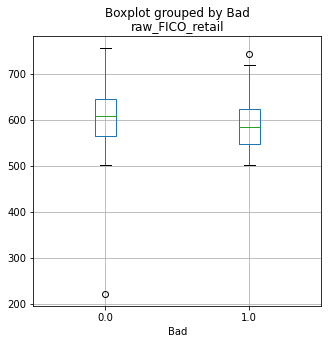

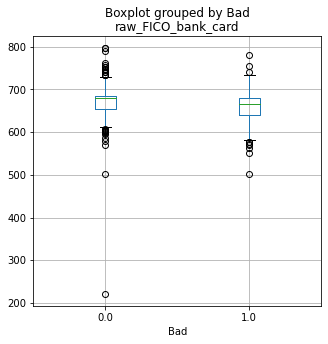

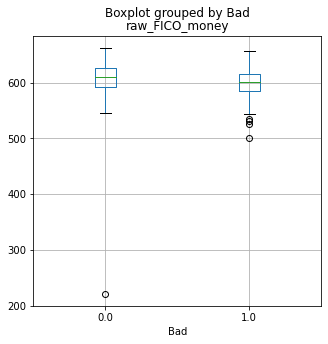

In [363]:
from scipy.stats import f_oneway

for column in ['amount_requested','age_years','monthly_rent_amount',
               'num_payments', 'payment_amount', 'loan_duration', 
               'monthly_income_amount', 'raw_l2c_score', 'raw_FICO_telecom',
               'raw_FICO_retail', 'raw_FICO_bank_card', 'raw_FICO_money']:

    application_data.boxplot(column = column, by = 'Bad', figsize = (5,5))
    
    good_numeric = list(application_data.loc[application_data['Bad'] == 0, column])
    bad_numeric = list(application_data.loc[application_data['Bad'] == 1, column])
    
    print('Column: ' + column)
    print(f_oneway(good_numeric, bad_numeric))
    
    
#payment_amount, num_payments, age_years seem to be different between groups visually
#raw_Fico_retail may have impact

#By anova test, all columns mentioned, plus all fico columns show importance



## Categorical feature vs Output feature importance

We will do chi square test, and bar plot of counts

In [276]:
application_data.columns

Index(['customer_id', 'amount_requested', 'birth_date', 'status',
       'residence_rent_or_own', 'monthly_rent_amount',
       'bank_account_direct_deposit', 'application_when', 'loan_duration',
       'payment_ach', 'num_payments', 'payment_amount', 'amount_approved',
       'duration_approved', 'payment_amount_approved', 'address_zip', 'email',
       'bank_routing_number', 'email_duration', 'residence_duration',
       'bank_account_duration', 'payment_frequency', 'home_phone_type',
       'other_phone_type', 'how_use_money', 'monthly_income_amount',
       'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail',
       'raw_FICO_bank_card', 'raw_FICO_money', 'Bad', 'age_years'],
      dtype='object')

Column: residence_rent_or_own P value = 0.012639643325889969
Column: bank_account_direct_deposit P value = 0.09148405793098253
Column: email_duration P value = 0.7927359835497567
Column: residence_duration P value = 0.11703942302360759
Column: bank_account_duration P value = 0.012422487595587537
Column: home_phone_type P value = 0.2071441901026286
Column: how_use_money P value = 0.0483138467167397


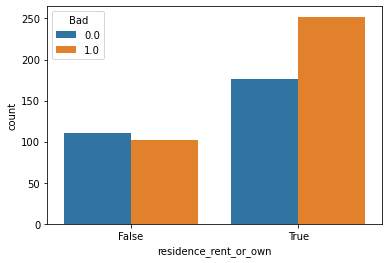

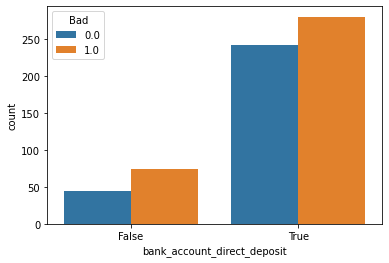

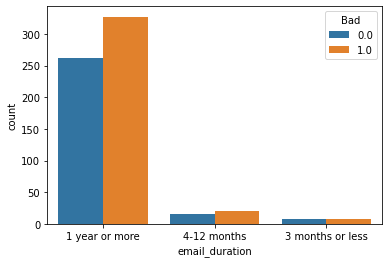

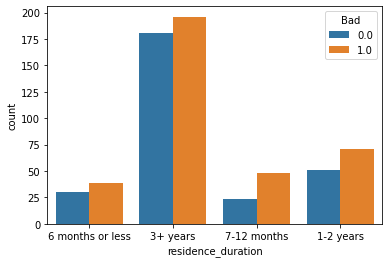

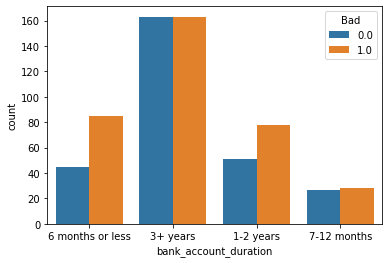

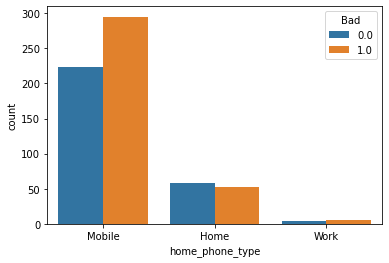

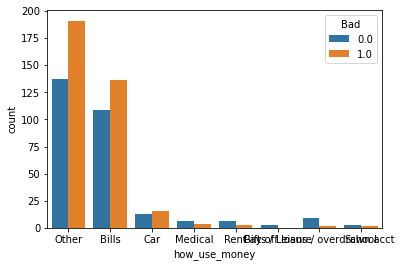

In [663]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency


for column in ['residence_rent_or_own', 'bank_account_direct_deposit', 'email_duration',
               'residence_duration', 'bank_account_duration', 'home_phone_type', 'how_use_money']:
    
    contigency = pd.crosstab(application_data['Bad'], application_data[column])
    c, p, dof, expected = chi2_contingency(contigency)
    print('Column: ' + str(column) + ' P value = ' + str(p))
    
    plt.figure()
    sns.countplot(x=column, hue="Bad", data=application_data)
    
#REsidence_rent_or_own, bank_account_duration, how_use_money seem important by chi square statistic.



In [288]:
application_data['how_use_money'].value_counts()

Other                             325
Bills (General)                    87
Bills                              61
Bills (Auto)                       49
Bills (Medical)                    32
Car                                29
Bills (Home / Utilities)           16
Pay off loans / overdrawn acct     11
Medical                            10
School                              5
Rent                                5
Rent / Mortgage                     4
Gifts / Leisure                     3
Won't say                           1
Name: how_use_money, dtype: int64

We may need to combine some levels of this column because this data is skewed.

In [23]:
application_data['how_use_money'] = application_data['how_use_money'].replace({'Bills (General)': 'Bills', 
                                           'Bills (Auto)':'Bills', 
                                           'Bills (Medical)': 'Bills', 
                                           'Bills (Home / Utilities)': 'Bills', 
                                           'Gifts / Leisure': 'Other',                                    
                                           'Rent / Mortgage': 'Rent', "Won't say":'Other'})

In [24]:
application_data['how_use_money'].value_counts()

Other                             329
Bills                             245
Car                                29
Pay off loans / overdrawn acct     11
Medical                            10
Rent                                9
School                              5
Name: how_use_money, dtype: int64

One flaw which I did find is majority are Other (so essentially that's not very specific).

Also we don't see much data in rest of the levels. So having those levels directly may not be beneficial, we can hope for the model to capture information though.

Upsampling on these levels also don't seem good idea, because their counts are less than 20. I would prefer upsampling if counts were atleast 50 to 100.

<AxesSubplot:xlabel='how_use_money', ylabel='count'>

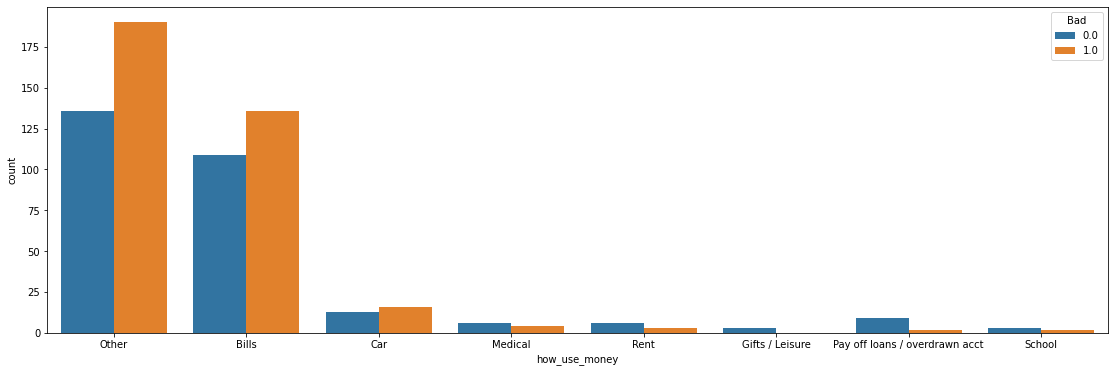

In [327]:
plt.figure(figsize=(19, 6))
sns.countplot(x="how_use_money", hue="Bad", data=application_data)

## Some Analysis Remaining
<br> 1. We may also need revenue profile for each of above type, meaning amount_requested vs how_use_money, and payment_amount / num_payments vs how_use_money.</br>
<br> 2. How many applications are having amount_approved less than amount_requested, and payment_amount_approved more or less than payment_amount (former is more important), and if any of it is related to other variables like FICO scores, monthly income, residence own or rent, etc. </br>
<br> 3. Feature imputations, and then generating interaction terms </br>
<br> 4. In the end, score of default, ROC curve analysis, True positive false positive analysis, festure importance from tree algorithms, etc. also important </br> 

In [331]:
application_data.loc[application_data['amount_requested'] != application_data['amount_approved'], 
                     ['amount_requested', 'amount_approved']]

,amount_requested,amount_approved
20,800,500
23,800,500
34,800,500
37,700,500
38,600,500
...,...,...
637,800,500
639,700,500
640,800,500
644,800,500


In [25]:
#Create additional column difference amount requested approved
application_data['difference_amount_requested_approved'] = application_data['amount_requested'] - application_data['amount_approved']




In [26]:
application_data['difference_amount_requested_approved_pct'] = application_data['difference_amount_requested_approved'] / application_data['amount_requested']



In [34]:
application_data['difference_amt_request_approve_flag'] = 0
application_data.loc[application_data['difference_amount_requested_approved_pct'] > 0, 
                     'difference_amt_request_approve_flag'] = 1




In [342]:
application_data

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,Bad,age_years,difference_amount_requested_approved,difference_amount_requested_approved_pct,difference_amt_request_approve_flag
0,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,...,614,574,600,656,561,0.0,19,0,0.000000,0
1,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,...,708,501,550,651,563,1.0,20,0,0.000000,0
2,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,...,687,522,561,661,598,0.0,30,0,0.000000,0
3,49fb42f51d,500,9/10/76,Approved,False,785,False,10/18/10 7:05,4,True,...,616,560,552,634,591,1.0,34,0,0.000000,0
4,195fbe5739,300,12/1/79,Approved,True,700,True,10/19/10 10:58,4,True,...,681,603,654,659,636,0.0,31,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0aeed95009,300,10/15/81,Approved,True,0,True,4/16/11 18:45,3,True,...,616,583,591,680,622,1.0,30,0,0.000000,0
643,755f6707c9,800,3/6/46,Approved,True,529,True,4/16/11 21:48,8,True,...,583,612,649,659,628,0.0,65,0,0.000000,0
644,9e9ca8f361,800,5/25/76,Approved,True,900,True,4/17/11 11:24,8,True,...,573,543,556,657,588,0.0,35,300,0.375000,1
645,0f7b7c2c37,500,6/9/60,Approved,True,650,True,4/17/11 12:06,5,True,...,329,571,616,650,618,1.0,51,0,0.000000,0


<AxesSubplot:xlabel='difference_amt_request_approve_flag', ylabel='count'>

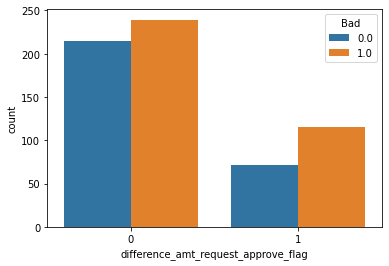

In [343]:
#Bi-variate analysis on this feature, and chi square test
plt.figure()
sns.countplot(x="difference_amt_request_approve_flag", hue="Bad", data=application_data)

In [344]:
column = 'difference_amt_request_approve_flag'
contigency = pd.crosstab(application_data['Bad'], application_data[column])
c, p, dof, expected = chi2_contingency(contigency)
print('Column: ' + str(column) + ' P value = ' + str(p))

Column: difference_amt_request_approve_flag P value = 0.0418999687037843


This <b>difference_amt_request_approve_flag </b> flag seems pretty important based on the p-value.

In [345]:
application_data['difference_amount_requested_approved_pct'].value_counts()

0.000000    454
0.375000    126
0.166667     32
0.285714     25
0.090909      1
0.333333      1
0.230769      1
Name: difference_amount_requested_approved_pct, dtype: int64

<AxesSubplot:xlabel='difference_amount_requested_approved_pct', ylabel='count'>

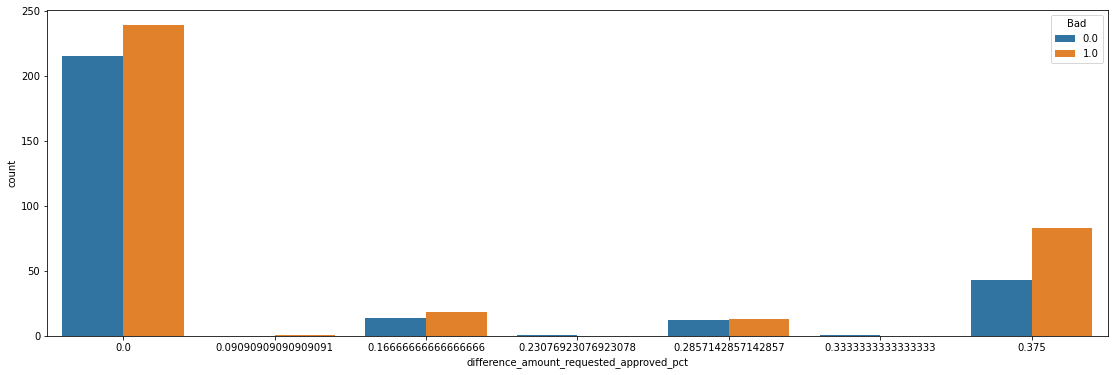

In [347]:
#We can see bar plot of difference amount request pct vs counts across Goo and Bad.
plt.figure(figsize=(19, 6))
sns.countplot(x="difference_amount_requested_approved_pct", hue="Bad", data=application_data)

So probably we can create a final flag to be used in ML model: if pct >0.30.

In [27]:
application_data['difference_amt_request_approve_flag'] = 0
application_data.loc[application_data['difference_amount_requested_approved_pct'] > 0.3, 
                     'difference_amt_request_approve_flag'] = 1

Just like with target variable, we want to see the relationship of this new feature with other numeric features.

Column: amount_requested
F_onewayResult(statistic=353.6733772265687, pvalue=4.151670466547731e-63)
Column: age_years
F_onewayResult(statistic=2.183532326344927, pvalue=0.13998744662973187)
Column: monthly_rent_amount
F_onewayResult(statistic=0.6187843272768719, pvalue=0.4317914815902082)
Column: num_payments
F_onewayResult(statistic=3.765637776132193, pvalue=0.05275608599964026)
Column: payment_amount
F_onewayResult(statistic=7.970087864441851, pvalue=0.004903965360018986)
Column: loan_duration
F_onewayResult(statistic=73.86088110200575, pvalue=6.447987774001533e-17)
Column: monthly_income_amount
F_onewayResult(statistic=1.1349826034014323, pvalue=0.28711803811186726)
Column: raw_l2c_score
F_onewayResult(statistic=0.43345525887302844, pvalue=0.5105358603324348)
Column: raw_FICO_telecom
F_onewayResult(statistic=10.284957805344655, pvalue=0.0014082532849526487)
Column: raw_FICO_retail
F_onewayResult(statistic=8.219492814987584, pvalue=0.00428100803610989)
Column: raw_FICO_bank_card
F_one

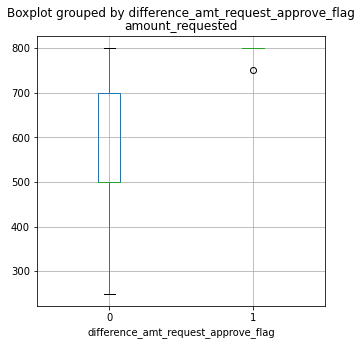

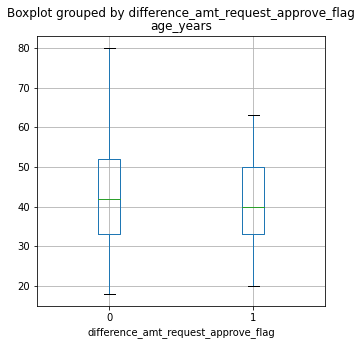

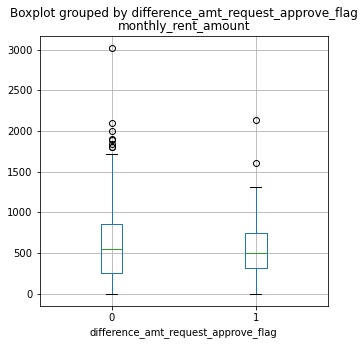

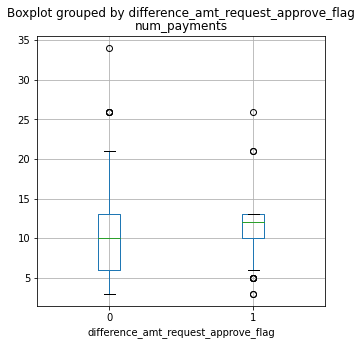

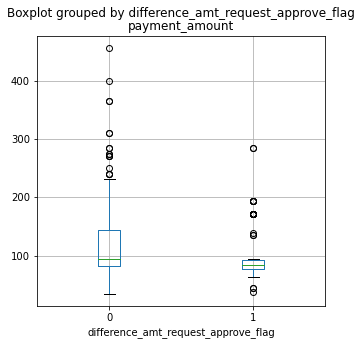

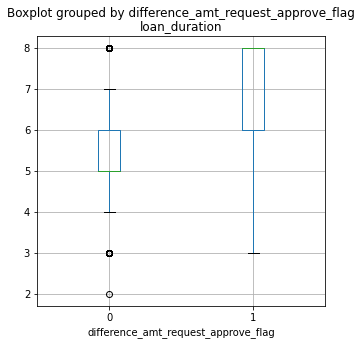

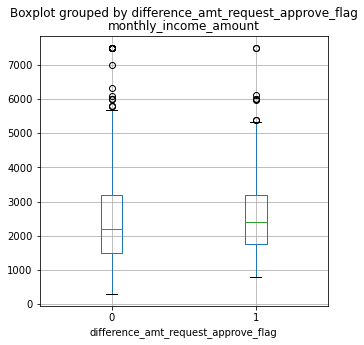

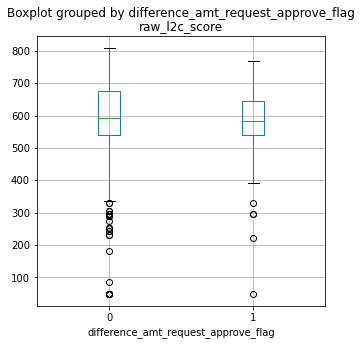

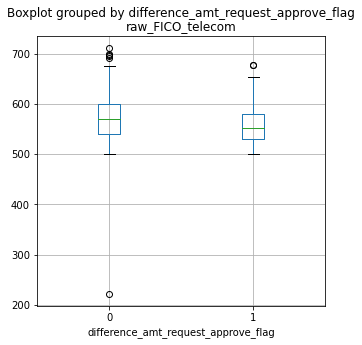

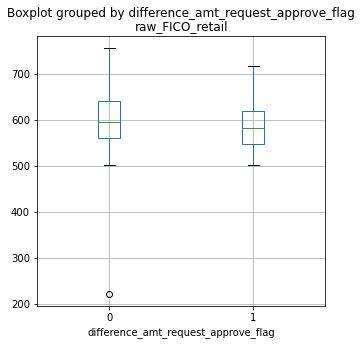

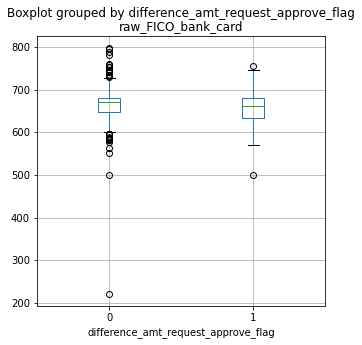

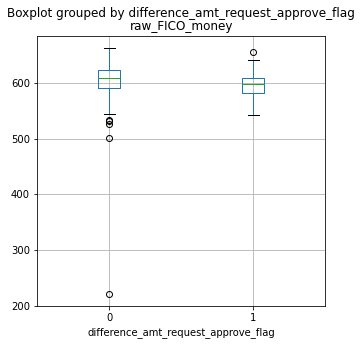

In [359]:
for column in ['amount_requested','age_years','monthly_rent_amount',
               'num_payments', 'payment_amount', 'loan_duration', 
               'monthly_income_amount', 'raw_l2c_score', 'raw_FICO_telecom',
               'raw_FICO_retail', 'raw_FICO_bank_card', 'raw_FICO_money']:
    

    application_data.boxplot(column = column, by = 'difference_amt_request_approve_flag', figsize = (5,5))
    
    good_numeric = list(application_data.loc[application_data['difference_amt_request_approve_flag'] == 0, column])
    bad_numeric = list(application_data.loc[application_data['difference_amt_request_approve_flag'] == 1, column])
    
    print('Column: ' + column)
    print(f_oneway(good_numeric, bad_numeric))
    
    #Visually amount_requested, num_payments, payment_amount, loan_duration seem most impacting
    #By Anova test, all above variables + all Fico variables seem important for this Flag.

<br><b> Another Idea </b>: To create interaction terms with the above features and flags created, thus adding more features. </br>
<br> But let's do this after missing value imputations / dropping / replacement, so as to be consistent. </br>

In [364]:
application_data.isnull().sum()
#payment_amount_approved = payment_amount
#other_phone_type = 'None'
#how_use_oney = 'Other'
#bank_account_duration = 3 + years

customer_id                                   0
amount_requested                              0
birth_date                                    0
status                                        0
residence_rent_or_own                         0
monthly_rent_amount                           0
bank_account_direct_deposit                   0
application_when                              0
loan_duration                                 0
payment_ach                                   0
num_payments                                  0
payment_amount                                0
amount_approved                               0
duration_approved                             0
payment_amount_approved                      20
address_zip                                   0
email                                         0
bank_routing_number                           0
email_duration                                0
residence_duration                            0
bank_account_duration                   

In [366]:
application_data['other_phone_type'].value_counts()

Work      216
Mobile     80
Home       63
Name: other_phone_type, dtype: int64

In [28]:
application_data['other_phone_type'].fillna('None', inplace = True)

In [29]:
application_data['how_use_money'].fillna('Other', inplace = True)

In [30]:
application_data['payment_amount_approved'] = application_data.apply(lambda x: x['payment_amount_approved'] if not pd.isnull(x['payment_amount_approved']) else x['payment_amount'], axis = 1)



In [31]:
application_data['bank_account_duration'].fillna('3+ years', inplace = True)

In [32]:
application_data.isnull().sum().max()

0

## Interaction terms generation (last feature engg step)

In [33]:
for column in ['amount_requested', 'num_payments', 'payment_amount', 'loan_duration', 'raw_FICO_telecom',
               'raw_FICO_retail', 'raw_FICO_bank_card', 'raw_FICO_money']:
    new_column = column + '_interaction_diff_amtapproved'
    application_data[new_column] = application_data[column]*application_data['difference_amt_request_approve_flag']

In [398]:
application_data

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,difference_amount_requested_approved_pct,difference_amt_request_approve_flag,amount_requested_interaction_diff_amtapproved,num_payments_interaction_diff_amtapproved,payment_amount_interaction_diff_amtapproved,loan_duration_interaction_diff_amtapproved,raw_FICO_telecom_interaction_diff_amtapproved,raw_FICO_retail_interaction_diff_amtapproved,raw_FICO_bank_card_interaction_diff_amtapproved,raw_FICO_money_interaction_diff_amtapproved
0,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,...,0.000000,0,0,0,0.00,0,0,0,0,0
1,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,...,0.000000,0,0,0,0.00,0,0,0,0,0
2,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,...,0.000000,0,0,0,0.00,0,0,0,0,0
3,49fb42f51d,500,9/10/76,Approved,False,785,False,10/18/10 7:05,4,True,...,0.000000,0,0,0,0.00,0,0,0,0,0
4,195fbe5739,300,12/1/79,Approved,True,700,True,10/19/10 10:58,4,True,...,0.000000,0,0,0,0.00,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0aeed95009,300,10/15/81,Approved,True,0,True,4/16/11 18:45,3,True,...,0.000000,0,0,0,0.00,0,0,0,0,0
643,755f6707c9,800,3/6/46,Approved,True,529,True,4/16/11 21:48,8,True,...,0.000000,0,0,0,0.00,0,0,0,0,0
644,9e9ca8f361,800,5/25/76,Approved,True,900,True,4/17/11 11:24,8,True,...,0.375000,1,800,13,77.39,8,543,556,657,588
645,0f7b7c2c37,500,6/9/60,Approved,True,650,True,4/17/11 12:06,5,True,...,0.000000,0,0,0,0.00,0,0,0,0,0


# Maybe a last feature engg step for Fico scores

In [184]:
application_data[application_data['raw_FICO_money'] < 600]['Bad'].value_counts()

1.0    166
0.0     94
Name: Bad, dtype: int64

In [187]:
application_data[application_data['raw_FICO_bank_card'] < 600]['Bad'].value_counts()

1.0    22
0.0     7
Name: Bad, dtype: int64

In [34]:
application_data['fico_money_flag'] = 0
application_data.loc[application_data['raw_FICO_money'] < 600, 'fico_money_flag'] = 1

In [35]:
application_data['fico_bankcard_flag'] = 0
application_data.loc[application_data['raw_FICO_bank_card'] < 600, 'fico_bankcard_flag'] = 1

In [190]:
application_data[(application_data['age_years'] >= 15) & (application_data['age_years'] < 25)]['Bad'].value_counts()

1.0    28
0.0     8
Name: Bad, dtype: int64

In [199]:
application_data[(application_data['age_years'] >= 25) & (application_data['age_years'] < 50)]['Bad'].value_counts()

1.0    237
0.0    168
Name: Bad, dtype: int64

In [200]:
application_data[(application_data['age_years'] >= 50) & (application_data['age_years'] < 150)]['Bad'].value_counts()

0.0    110
1.0     89
Name: Bad, dtype: int64

In [193]:
application_data[(application_data['age_years'] >= 35) & (application_data['age_years'] < 40)]['Bad'].value_counts()

1.0    47
0.0    30
Name: Bad, dtype: int64

In [194]:
application_data[(application_data['age_years'] >= 40) & (application_data['age_years'] < 45)]['Bad'].value_counts()

1.0    61
0.0    45
Name: Bad, dtype: int64

In [195]:
application_data[(application_data['age_years'] >= 45) & (application_data['age_years'] < 50)]['Bad'].value_counts()

1.0    40
0.0    30
Name: Bad, dtype: int64

In [198]:
application_data[(application_data['age_years'] >= 50) & (application_data['age_years'] < 150)]['Bad'].value_counts()

0.0    110
1.0     89
Name: Bad, dtype: int64

Below 25, 25 to 50, above 50.

In [36]:
bins = [15, 25, 50, 140]
labels = ['young', 'mid', 'old']
application_data['age_bucket'] = pd.cut(x = application_data['age_years'], bins = bins, 
                                        labels = labels, include_lowest = True)

In [37]:
application_data.loc[:, ['age_years', 'age_bucket']]

,age_years,age_bucket
0,19,young
1,20,young
2,30,mid
3,34,mid
4,31,mid
...,...,...
642,30,mid
643,65,old
644,35,mid
645,51,old


In [337]:
application_data.columns

Index(['customer_id', 'amount_requested', 'birth_date', 'status',
       'residence_rent_or_own', 'monthly_rent_amount',
       'bank_account_direct_deposit', 'application_when', 'loan_duration',
       'payment_ach', 'num_payments', 'payment_amount', 'amount_approved',
       'duration_approved', 'payment_amount_approved', 'address_zip', 'email',
       'bank_routing_number', 'email_duration', 'residence_duration',
       'bank_account_duration', 'payment_frequency', 'home_phone_type',
       'other_phone_type', 'how_use_money', 'monthly_income_amount',
       'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail',
       'raw_FICO_bank_card', 'raw_FICO_money', 'Bad', 'age_years',
       'difference_amount_requested_approved',
       'difference_amount_requested_approved_pct',
       'difference_amt_request_approve_flag',
       'amount_requested_interaction_diff_amtapproved',
       'num_payments_interaction_diff_amtapproved',
       'payment_amount_interaction_diff_amtapproved',
   

## How about savings, and ratio of payment amnt / savings

In [38]:
application_data['ratio_payment_income'] = application_data['payment_amount_approved'] / (application_data['monthly_income_amount'] - application_data['monthly_rent_amount'] + 10)



<AxesSubplot:ylabel='Frequency'>

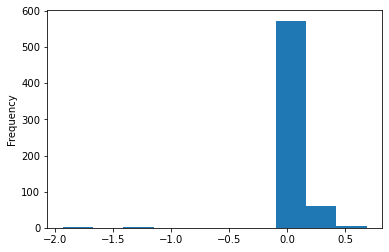

In [39]:
application_data['ratio_payment_income'].plot(kind = 'hist')

In [211]:
application_data['ratio_payment_income'].min()

-1.93475

In [230]:
application_data[(application_data['ratio_payment_income'] >= 0.0) & 
                 (application_data['ratio_payment_income'] < 0.05)]['Bad'].value_counts()



1.0    146
0.0    107
Name: Bad, dtype: int64

In [231]:
application_data[(application_data['ratio_payment_income'] >= 0.05) & 
                 (application_data['ratio_payment_income'] < 0.1)]['Bad'].value_counts()

1.0    137
0.0     99
Name: Bad, dtype: int64

In [232]:
application_data[(application_data['ratio_payment_income'] >= 0.1) & 
                 (application_data['ratio_payment_income'] < 0.15)]['Bad'].value_counts()

1.0    39
0.0    29
Name: Bad, dtype: int64

In [233]:
application_data[(application_data['ratio_payment_income'] >= 0.15) & 
                 (application_data['ratio_payment_income'] < 0.2)]['Bad'].value_counts()

0.0    26
1.0    15
Name: Bad, dtype: int64

In [235]:
application_data[(application_data['ratio_payment_income'] >= 0.2) & 
                 (application_data['ratio_payment_income'] < 0.6)]['Bad'].value_counts()

0.0    23
1.0    15
Name: Bad, dtype: int64

## All about modeling

<br> 1. We will decide which features to be used, and we will apply gridsearchCV to various classification algorithms </br>
<br> 2. We will split the data into train and test </br>
<br> 3. We will see feature iportance from Random forest or gradient boosting </br>
<br> 4. We will do cross validation on train dataset as well </br>
<br> 4.5. Control overfitting by regularization if validation score is poor </br>
<br> 5. We will train the whole data, and have score for classification into Bad </br>
<br> 6. We will apply some ensembling methods like Boosting and bagging, and draw conclusions on which model works and why </br>
<br> 7. We will evaluate results by AUROC, and by COnfusion Matrix, and sensitivity, precision, recall measures </br>
<br> 8. We will see if ML results are interpretable in any of decision tree, random forest or gradient boosting, only if possible </br>
<br> 9. Check both training and test accuracies. </br>


## Algorithms I can think of

<br>Random forest</br>
<br>Gradient Boosting / Ada boosting</br>
<br>Logistic Regression</br>
<br>SVM classification with kernel parameters</br>
<br>Naive Bayes</br>
<br>KNN</br>

<b>Imp: Check which algos naturally give probability score </b>

In [403]:
application_data.columns

Index(['customer_id', 'amount_requested', 'birth_date', 'status',
       'residence_rent_or_own', 'monthly_rent_amount',
       'bank_account_direct_deposit', 'application_when', 'loan_duration',
       'payment_ach', 'num_payments', 'payment_amount', 'amount_approved',
       'duration_approved', 'payment_amount_approved', 'address_zip', 'email',
       'bank_routing_number', 'email_duration', 'residence_duration',
       'bank_account_duration', 'payment_frequency', 'home_phone_type',
       'other_phone_type', 'how_use_money', 'monthly_income_amount',
       'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail',
       'raw_FICO_bank_card', 'raw_FICO_money', 'Bad', 'age_years',
       'difference_amount_requested_approved',
       'difference_amount_requested_approved_pct',
       'difference_amt_request_approve_flag',
       'amount_requested_interaction_diff_amtapproved',
       'num_payments_interaction_diff_amtapproved',
       'payment_amount_interaction_diff_amtapproved',
   

In [40]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(application_data, test_size=0.2, random_state=42)
training_columns = ['amount_requested', 'residence_rent_or_own', 'monthly_rent_amount', 
                    'bank_account_direct_deposit', 'loan_duration', 'num_payments', 'payment_amount',
                    'amount_approved', 'duration_approved', 'payment_amount_approved', 'residence_duration',
                    'bank_account_duration', 'payment_frequency', 'how_use_money', 'monthly_income_amount',
                    'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card', 'raw_FICO_money',
                    'age_years', 'difference_amt_request_approve_flag', 
                    'amount_requested_interaction_diff_amtapproved', 'num_payments_interaction_diff_amtapproved',
                    'payment_amount_interaction_diff_amtapproved', 'loan_duration_interaction_diff_amtapproved',
                    'raw_FICO_telecom_interaction_diff_amtapproved', 'raw_FICO_retail_interaction_diff_amtapproved',
                    'raw_FICO_bank_card_interaction_diff_amtapproved', 'raw_FICO_money_interaction_diff_amtapproved',
                    'fico_money_flag', 'fico_bankcard_flag', 'age_bucket', 'ratio_payment_income'
                   
                   ]

In [47]:
train_set['Bad'].value_counts()

1.0    280
0.0    232
Name: Bad, dtype: int64

In [558]:
#Upsample train set randomly
np.random.seed(0)

#bad_index = train_set[train_set['Bad'] == 1].index
# bad_index = train_set.index
# bad_index = np.random.choice(bad_index, 200)
# train_set = pd.concat([train_set.loc[bad_index,:], train_set])

In [499]:
train_set['Bad'].value_counts()

1.0    380
0.0    232
Name: Bad, dtype: int64

In [41]:
x_train = train_set.loc[:,training_columns]
y_train = train_set['Bad']
#test
x_test = test_set.loc[:,training_columns]
y_test = test_set['Bad']

## GridCV function going through various algorithms and finding best parameters

In [145]:
#Defining some pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

#cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
cat_attribs = [
    "residence_duration", 
    "bank_account_duration",
    "how_use_money",
    "payment_frequency",

    "age_bucket",
    #"fico_bankcard_flag",
]

num_attribs = [
    'amount_requested', 
    'monthly_rent_amount', 
    'loan_duration',
    'num_payments',
    'payment_amount',
    'amount_approved',
    'duration_approved',
    'payment_amount_approved',
    'monthly_income_amount',
    #'raw_l2c_score', 
    #'raw_FICO_telecom', 
    #'raw_FICO_retail', 
    'raw_FICO_bank_card', 
    'raw_FICO_money',
    #'age_years',
    'difference_amt_request_approve_flag', 
    'amount_requested_interaction_diff_amtapproved', 
    'num_payments_interaction_diff_amtapproved',
    'payment_amount_interaction_diff_amtapproved', 
    'loan_duration_interaction_diff_amtapproved',
    #'raw_FICO_telecom_interaction_diff_amtapproved', 
    #'raw_FICO_retail_interaction_diff_amtapproved',
    'raw_FICO_bank_card_interaction_diff_amtapproved', 
    'raw_FICO_money_interaction_diff_amtapproved',
    'ratio_payment_income',
    'fico_money_flag',
    #'fico_bankcard_flag',
    #'fico_money_flag'
]






pca = PCA(n_components=4)

# Create a pipeline for the numeric features.
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        #('std_scaler', StandardScaler()),
        #("pca", pca),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=True, handle_unknown="ignore"))
    ])


# Union the transformed, scaled numeric and categorical features.
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
        #("pca", pca),
    ])

In [146]:
#Baseline logistic
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LogisticRegression())
    ])

start = time()
full_pipeline_with_predictor.fit(x_train, y_train)

# Time and score training predictions
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
logit_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, cv=cv)
logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(x_test, y_test)
test_time = np.round(time() - start, 4)


In [147]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
# Imports for stats
from scipy import stats
                       

results = pd.DataFrame(columns=["ExpID", "Train Accuracy (Mean)", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

# Convert a number to a percent.    
def pct(x):
    return round(100*x,1)

# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix='', scoring = 'accuracy', 
                      single_classifier = None, parameters_grid_passed = None):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Support Vector', SVC(random_state=42)),
        ('Stochastic GD', SGDClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier()),
    ]
    
    if single_classifier:
        classifiers = single_classifier

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ['l2'],
            'tol': [0.0001, 0.00001, 0.0000001], 
            'C': [10, 1, 0.1, 0.01],
        },
        'K-Nearest Neighbors': {
            'n_neighbors': (3, 5, 7, 8, 11),
            'p': (1,2),
        },
        'Naive Bayes': {},
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': (1, 2, 3, 4, 5),
            'C': (10, 1, 0.1, 0.01),
        },
        'Stochastic GD': {
            'loss': ('hinge', 'perceptron', 'log'),
            'penalty': ('l1', 'l2', 'elasticnet'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'alpha': (0.1, 0.01, 0.001, 0.0001), 
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22, 26, 30],
            'max_features': [1, 3, 5],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'bootstrap': [False],
            'n_estimators':[20, 80, 150, 200, 300]},
    }

    if parameters_grid_passed:
        for each in parameters_grid_passed:
            params_grid[each] = parameters_grid_passed[each]    
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
            
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring=scoring, cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(x_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        # Generate 30 training accuracy scores with the best estimator and 30-split CV
        best_train_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=cv)
        best_train_accuracy = pct(best_train_scores.mean())

        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,3), train_time, test_time, json.dumps(param_dump)]
    if single_classifier:
        return grid_search
        
        

In [681]:
ConductGridSearch(x_train, y_train, x_test, y_test, 0, "Best Model:")

****** START Best Model: Logistic Regression *****
Parameters:
	C: [10, 1, 0.1, 0.01]
	penalty: ['l2']
	tol: [0.0001, 1e-05, 1e-07]
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:
	predictor__C: 0.01
	predictor__penalty: l2
	predictor__tol: 0.0001
****** FINISH Best Model: Logistic Regression  *****

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: (3, 5, 7, 8, 11)
	p: (1, 2)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
	predictor__n_neighbors: 11
	predictor__p: 1
****** FINISH Best Model: K-Nearest Neighbors  *****

****** START Best Model: Naive Bayes *****
Parameters:
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
****** FINISH Best Model: Naive Bayes  *****

****** START Best Model: Support Vector *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	degree: (1, 2, 3, 4, 5)
	kernel: ('rbf', 'poly')
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters:

In [682]:
results

,ExpID,Train Accuracy (Mean),Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
1,Best Model:Logistic Regression,61.2,58.6,0.000,0.0075,0.0021,"[[""predictor__C"", 0.01], [""predictor__penalty""..."
2,Best Model:K-Nearest Neighbors,57.3,63.3,0.396,0.0058,0.0092,"[[""predictor__n_neighbors"", 11], [""predictor__..."
3,Best Model:Naive Bayes,57.0,60.2,0.663,0.0042,0.0019,[]
4,Best Model:Support Vector,61.5,59.4,0.000,0.0144,0.0032,"[[""predictor__C"", 10], [""predictor__degree"", 1..."
5,Best Model:Stochastic GD,61.1,58.6,0.000,0.0061,0.0021,"[[""predictor__alpha"", 0.1], [""predictor__loss""..."
6,Best Model:RandomForest,60.3,59.4,0.000,0.1984,0.0180,"[[""predictor__bootstrap"", false], [""predictor_..."


In [455]:
results['Experiment description'][6]

'[["predictor__bootstrap", false], ["predictor__max_depth", 26], ["predictor__max_features", 3], ["predictor__min_samples_leaf", 10], ["predictor__min_samples_split", 5], ["predictor__n_estimators", 20]]'

In [457]:
results = pd.DataFrame(columns=["ExpID", "Train Accuracy (Mean)", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
ConductGridSearch(x_train, y_train, x_test, y_test, 0, "Best Model:", 'roc_auc')

****** START Best Model: Logistic Regression *****
Parameters:
	C: [10, 1, 0.1, 0.01]
	penalty: ['l2']
	tol: [0.0001, 1e-05, 1e-07]
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:
	predictor__C: 0.01
	predictor__penalty: l2
	predictor__tol: 0.0001
****** FINISH Best Model: Logistic Regression  *****

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: (3, 5, 7, 8, 11)
	p: (1, 2)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
	predictor__n_neighbors: 5
	predictor__p: 1
****** FINISH Best Model: K-Nearest Neighbors  *****

****** START Best Model: Naive Bayes *****
Parameters:
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
****** FINISH Best Model: Naive Bayes  *****

****** START Best Model: Support Vector *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	degree: (1, 2, 3, 4, 5)
	kernel: ('rbf', 'poly')
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters:


In [458]:
results

,ExpID,Train Accuracy (Mean),Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
1,Best Model:Logistic Regression,54.2,57.0,0.004,0.0057,0.0017,"[[""predictor__C"", 0.01], [""predictor__penalty""..."
2,Best Model:K-Nearest Neighbors,54.6,54.7,0.031,0.0020,0.0057,"[[""predictor__n_neighbors"", 5], [""predictor__p..."
3,Best Model:Naive Bayes,56.0,59.4,0.317,0.0022,0.0014,[]
4,Best Model:Support Vector,54.1,57.8,0.003,0.0076,0.0024,"[[""predictor__C"", 0.01], [""predictor__degree"",..."
5,Best Model:Stochastic GD,53.6,57.8,0.000,0.0028,0.0016,"[[""predictor__alpha"", 0.1], [""predictor__loss""..."
6,Best Model:RandomForest,55.1,57.8,0.093,0.0137,0.0028,"[[""predictor__bootstrap"", false], [""predictor_..."


Additional algorithm, which we will try: <b>Gradient Boost algorithm</b>

In [148]:
single_classifier =  [('Gradient Boost Classifier', GradientBoostingClassifier(random_state = 1)),]
parameters_grid_passed = {'Gradient Boost Classifier': {
            'learning_rate':[0.30],
            'n_estimators':[50],
            'max_depth':[5],
        }}

grid_search_clf = ConductGridSearch(x_train, y_train, x_test, y_test, 0, "Best Model:", 'roc_auc', 
                                    single_classifier = single_classifier, parameters_grid_passed = parameters_grid_passed)
#grid_search_clf = grid_search_multi_models(X_train, y_train, X_test, y_test,single_regressor, parameters_grid_passed)

****** START Best Model: Gradient Boost Classifier *****
Parameters:
	learning_rate: [0.3]
	max_depth: [5]
	n_estimators: [50]
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
	predictor__learning_rate: 0.3
	predictor__max_depth: 5
	predictor__n_estimators: 50
****** FINISH Best Model: Gradient Boost Classifier  *****



In [56]:
grid_search_clf.best_estimator_.get_params()['predictor']

GradientBoostingClassifier(max_depth=10, random_state=1)

In [149]:
y_train_predicted = grid_search_clf.best_estimator_.predict(x_train)
y_train_probabilities = grid_search_clf.best_estimator_.predict_proba(x_train)

y_test_predicted = grid_search_clf.best_estimator_.predict(x_test)
y_test_probabilities = grid_search_clf.best_estimator_.predict_proba(x_test)

In [482]:
(y_test_predicted)

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1.])

In [150]:
y_train_probabilities = [y_train_probabilities[i][1] for i in range(len(y_train_probabilities))]
y_test_probabilities = [y_test_probabilities[i][1] for i in range(len(y_test_probabilities))]

In [590]:
results

,ExpID,Train Accuracy (Mean),Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
1,Best Model:Gradient Boost Classifier,54.8,58.6,0.067,1.2668,0.0056,"[[""predictor__learning_rate"", 0.1], [""predicto..."


In [484]:
y_train_probabilities

[0.5714114622520585,
 0.38095804029698793,
 0.38095804029698793,
 0.6666945593991942,
 0.20001065400000342,
 0.5434783510855004,
 0.8461080028616552,
 0.8461080028616552,
 2.383051262144699e-05,
 0.6363822620119471,
 0.6921791500664444,
 2.383051262144699e-05,
 0.38095804029698793,
 0.5434783510855004,
 0.6001292093844839,
 0.5434783510855004,
 0.5882343193660051,
 0.5434783510855004,
 0.6001292093844839,
 0.5999698210002308,
 0.49998896173176915,
 0.6190598521158046,
 0.9998432657281509,
 0.38095804029698793,
 0.28572453513616625,
 0.5000024728604371,
 0.4000139304512474,
 0.6921791500664444,
 0.8461080028616552,
 0.5434783510855004,
 0.6921791500664444,
 0.5434783510855004,
 0.5434783510855004,
 0.5714114622520585,
 0.6001292093844839,
 0.6001292093844839,
 0.5434783510855004,
 0.38095804029698793,
 0.38095804029698793,
 0.5000023045414652,
 0.4000139304512474,
 0.6190598521158046,
 0.38095804029698793,
 0.49998896173176915,
 0.5434783510855004,
 0.5000012444441696,
 0.35000541688983

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [151]:
cm = confusion_matrix(y_test,y_test_predicted)

In [239]:
y_test_predicted2 = np.array(y_test_probabilities)
y_test_predicted2[y_test_predicted2 > 0.30] = 1
y_test_predicted2[y_test_predicted2 <= 0.30] = 0

In [133]:
cm = confusion_matrix(y_test,y_test_predicted2)

NameError: name 'y_test_predicted2' is not defined

In [243]:
print(classification_report(y_test,y_test_predicted2))

              precision    recall  f1-score   support

         0.0       0.68      0.48      0.57        54
         1.0       0.69      0.84      0.76        74

    accuracy                           0.69       128
   macro avg       0.69      0.66      0.66       128
weighted avg       0.69      0.69      0.68       128



[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

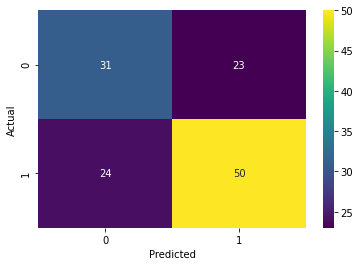

In [143]:
graph = sns.heatmap(cm,annot=True,cmap='viridis')
graph.set( xlabel = "Predicted", ylabel = "Actual")

In [712]:
x_train.shape

(512, 30)

[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

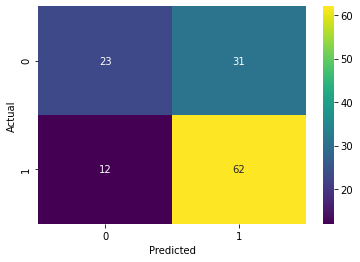

In [351]:
graph = sns.heatmap(cm,annot=True,cmap='viridis')
graph.set( xlabel = "Predicted", ylabel = "Actual")

In [276]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61        54
         1.0       0.72      0.69      0.70        74

    accuracy                           0.66       128
   macro avg       0.66      0.66      0.66       128
weighted avg       0.67      0.66      0.67       128



Precision decent, recall pretty good, which is important.

In [152]:
roc_auc_score(y_test,y_test_probabilities)

0.6971971971971972

In [53]:
roc_auc_score(y_train,y_train_probabilities)

1.0

Train area under roc is high, test area under roc not that high. Looks like overfitting.

In [61]:
cm_train = confusion_matrix(y_train,y_train_predicted)

[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

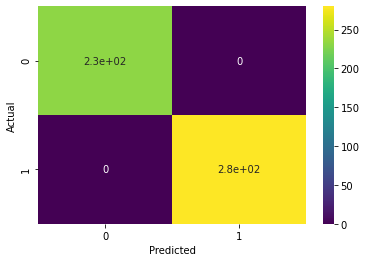

In [62]:
graph = sns.heatmap(cm_train,annot=True,cmap='viridis')
graph.set( xlabel = "Predicted", ylabel = "Actual")

In [635]:
print(classification_report(y_train,y_train_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       232
         1.0       1.00      1.00      1.00       280

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



Slightly higher recall and precision in train data. Boosting will tend to overfit a bit.
If we get ore data then this will become better.

In [600]:
grid_search_clf.best_estimator_.named_steps['predictor']

GradientBoostingClassifier(max_depth=10, n_estimators=200, random_state=1)

In [64]:
grid_search_clf.best_estimator_.named_steps['predictor'].feature_importances_

array([3.42441769e-02, 8.55498292e-02, 4.75546763e-03, 1.46825497e-02,
       2.17141462e-02, 1.10854745e-02, 3.83759791e-03, 6.50875325e-02,
       1.17723385e-01, 1.74341155e-01, 1.01492855e-01, 9.48277849e-06,
       2.15765936e-05, 2.71848020e-02, 8.13119010e-03, 3.45646369e-03,
       9.89573722e-03, 2.03827005e-02, 1.16490683e-01, 8.42046664e-03,
       1.76402671e-03, 2.66616473e-03, 8.44287312e-03, 2.40644298e-02,
       1.71095826e-02, 7.11147416e-03, 5.76825167e-03, 2.37471400e-03,
       1.04192246e-02, 4.14419083e-03, 3.11015557e-03, 7.49411541e-03,
       1.38490684e-03, 6.84204149e-04, 4.74316691e-03, 1.32334324e-05,
       2.73962703e-02, 8.05312301e-03, 1.60543130e-03, 2.44669375e-04,
       1.19671776e-02, 1.92665888e-03, 1.90046832e-02])

In [576]:
grid_search_clf.best_estimator_.named_steps

{'preparation': FeatureUnion(transformer_list=[('cat_pipeline',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['residence_duration',
                                                                                     'bank_account_duration',
                                                                                     'how_use_money'])),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]))]),
 'predictor': GradientBoostingClassifier(max_depth=10, n_estimators=200, random_state=1)}

In [702]:
grid_search_clf.best_estimator_.named_steps['predictor'].feature_importances_

array([1.81107391e-02, 5.81794723e-02, 1.83073216e-02, 1.57753985e-02,
       2.28218746e-02, 1.32116224e-02, 9.44298253e-03, 4.52543642e-02,
       6.95670133e-02, 7.67667890e-02, 8.64224432e-02, 1.23393666e-01,
       9.68431142e-02, 7.95578749e-02, 9.59152822e-02, 1.43400310e-04,
       2.02023277e-04, 4.83780314e-03, 3.37035737e-03, 2.83671503e-03,
       1.04477773e-02, 9.19993844e-03, 5.14957466e-03, 7.68763135e-03,
       2.26578397e-03, 5.68784426e-03, 4.94440332e-03, 2.11148809e-03,
       1.62981538e-02, 8.18336724e-03, 3.35019671e-03, 9.18549734e-03,
       2.76877347e-03, 3.60653134e-03, 7.54457260e-04, 5.84343851e-03,
       4.93655396e-03, 1.32744946e-02, 8.84125234e-04, 6.10532663e-04,
       2.30124579e-02, 4.71649387e-05, 4.58908322e-03, 1.42004728e-02])

## What if simple Naive Bayes algo applied

In [244]:
single_classifier =  [('Naive Bayes', GradientBoostingClassifier(random_state = 1)),]
parameters_grid_passed = {'Naive Bayes': {

        }}

grid_search_clf2 = ConductGridSearch(x_train, y_train, x_test, y_test, 0, "Best Model:", 'roc_auc', 
                                    single_classifier = single_classifier, parameters_grid_passed = parameters_grid_passed)
#grid_search_clf = grid_search_multi_models(X_train, y_train, X_test, y_test,single_regressor, parameters_grid_passed)

****** START Best Model: Naive Bayes *****
Parameters:
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
****** FINISH Best Model: Naive Bayes  *****



In [245]:
y_train_predicted = grid_search_clf2.best_estimator_.predict(x_train)
y_train_probabilities = grid_search_clf2.best_estimator_.predict_proba(x_train)

y_test_predicted = grid_search_clf2.best_estimator_.predict(x_test)
y_test_probabilities = grid_search_clf2.best_estimator_.predict_proba(x_test)

In [246]:
y_train_probabilities = [y_train_probabilities[i][1] for i in range(len(y_train_probabilities))]
y_test_probabilities = [y_test_probabilities[i][1] for i in range(len(y_test_probabilities))]

In [671]:
results

,ExpID,Train Accuracy (Mean),Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
1,Best Model:Naive Bayes,59.0,58.6,0.003,0.1348,0.0027,[]


In [247]:
cm = confusion_matrix(y_test,y_test_predicted)

[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

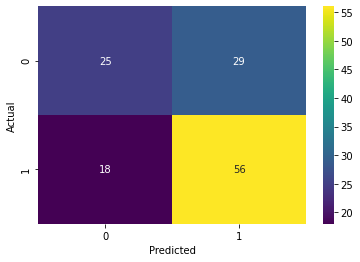

In [248]:
graph = sns.heatmap(cm,annot=True,cmap='viridis')
graph.set( xlabel = "Predicted", ylabel = "Actual")

In [250]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.58      0.46      0.52        54
         1.0       0.66      0.76      0.70        74

    accuracy                           0.63       128
   macro avg       0.62      0.61      0.61       128
weighted avg       0.63      0.63      0.62       128



In [251]:
roc_auc_score(y_test,y_test_probabilities)

0.6556556556556556

In [252]:
roc_auc_score(y_train,y_train_probabilities)

0.9751693349753695

In [253]:
y_test_predicted2 = np.array(y_test_probabilities)
y_test_predicted2[y_test_predicted2 > 0.30] = 1
y_test_predicted2[y_test_predicted2 <= 0.30] = 0

[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

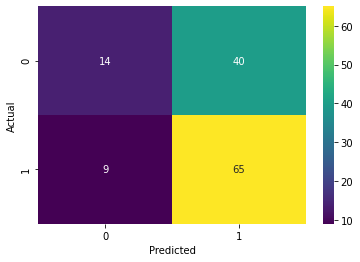

In [254]:
cm = confusion_matrix(y_test,y_test_predicted2)

graph = sns.heatmap(cm,annot=True,cmap='viridis')
graph.set( xlabel = "Predicted", ylabel = "Actual")

In [255]:
print(classification_report(y_test,y_test_predicted2))

              precision    recall  f1-score   support

         0.0       0.61      0.26      0.36        54
         1.0       0.62      0.88      0.73        74

    accuracy                           0.62       128
   macro avg       0.61      0.57      0.54       128
weighted avg       0.61      0.62      0.57       128



In [686]:
results['Experiment description'][1]

'[["predictor__C", 0.01], ["predictor__penalty", "l2"], ["predictor__tol", 0.0001]]'

## KNN Classification

In [691]:
single_classifier =  [('K-Nearest Neighbors', KNeighborsClassifier()),]
parameters_grid_passed = {'K-Nearest Neighbors': {
            'n_neighbors': [11],
            'p': [1],
        }}
grid_search_clf3 = ConductGridSearch(x_train, y_train, x_test, y_test, 0, "Best Model:", 'roc_auc', 
                                     
                                    single_classifier = single_classifier, parameters_grid_passed = parameters_grid_passed)

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: [11]
	p: [1]
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
	predictor__n_neighbors: 11
	predictor__p: 1
****** FINISH Best Model: K-Nearest Neighbors  *****



In [689]:
results['Experiment description'][2]

'[["predictor__n_neighbors", 11], ["predictor__p", 1]]'

In [692]:
y_train_predicted = grid_search_clf3.best_estimator_.predict(x_train)
y_train_probabilities = grid_search_clf3.best_estimator_.predict_proba(x_train)

y_test_predicted = grid_search_clf3.best_estimator_.predict(x_test)
y_test_probabilities = grid_search_clf3.best_estimator_.predict_proba(x_test)

In [693]:
y_train_probabilities = [y_train_probabilities[i][1] for i in range(len(y_train_probabilities))]
y_test_probabilities = [y_test_probabilities[i][1] for i in range(len(y_test_probabilities))]

In [694]:
cm = confusion_matrix(y_test,y_test_predicted)

[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

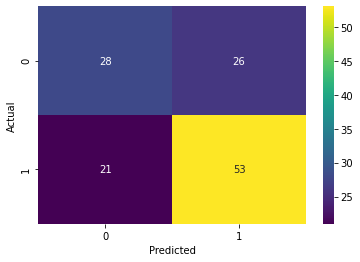

In [695]:
graph = sns.heatmap(cm,annot=True,cmap='viridis')
graph.set( xlabel = "Predicted", ylabel = "Actual")

In [278]:
roc_auc_score(y_test,y_test_probabilities)

0.6971971971971972

Plots

<AxesSubplot:xlabel='age_years', ylabel='monthly_income_amount'>

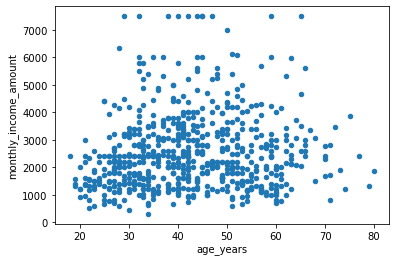

In [699]:
application_data.plot(x = 'age_years', y = 'monthly_income_amount', kind = 'scatter')

In [698]:
application_data.columns

Index(['customer_id', 'amount_requested', 'birth_date', 'status',
       'residence_rent_or_own', 'monthly_rent_amount',
       'bank_account_direct_deposit', 'application_when', 'loan_duration',
       'payment_ach', 'num_payments', 'payment_amount', 'amount_approved',
       'duration_approved', 'payment_amount_approved', 'address_zip', 'email',
       'bank_routing_number', 'email_duration', 'residence_duration',
       'bank_account_duration', 'payment_frequency', 'home_phone_type',
       'other_phone_type', 'how_use_money', 'monthly_income_amount',
       'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail',
       'raw_FICO_bank_card', 'raw_FICO_money', 'Bad', 'age_years',
       'difference_amount_requested_approved',
       'difference_amount_requested_approved_pct',
       'difference_amt_request_approve_flag',
       'amount_requested_interaction_diff_amtapproved',
       'num_payments_interaction_diff_amtapproved',
       'payment_amount_interaction_diff_amtapproved',
   

## Analysis on Fico scores, New features from them, and PCA, and Analysis on Defaults principal

PCA is a good idea since there is a chance of overfitting and we can try to curb it by dimensionality reduction.
We can also try normalizing the variables (standard scalar) or doing nothing to them.

In [196]:
application_data['raw_FICO_money'].max()

662

<b>Money fico flag added </b>

<b>Age bucket flag to be added </b>

<b>Also analysis on what if their income changed </b>

<b> Analysis on defaults principal </b>

<b> Ratio of payment amount / savings also created </b>

Future Scope:

If these lenders provide savings account:

If we have Bank statements data and transactional history, we can predict expenses from there as well.

What if analysis, eithe on income increase, or payment amount / amount approved / loan duration decreased.

Also, another possible solution: If someone is laid off, can we predict that info from Bank statements (assuing the bank is the primary bank), or credit card statements.

Also want to know which industry is the person working on. That will determine the hike percentage, job stability and movement, etc.

Also, his average credit / debit balance, and how regularly he pays.

Also importantly, number of members in his famiky (and how many of them are working); if one member is laid off, or something changed, predicting that as well.
We won't know personally what has changed (example if their son drops out of college, or a person gets married), but what if we can predict those things from the credit / debit statements we receive, update the model with the details of their family members / marital status, etc.


Code for plotting gradient boost trees: https://stackoverflow.com/questions/44974360/how-to-visualize-an-sklearn-gradientboostingclassifier

## How about support vector machine (have to learn it anyway)

In [63]:
application_data


,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,payment_amount_interaction_diff_amtapproved,loan_duration_interaction_diff_amtapproved,raw_FICO_telecom_interaction_diff_amtapproved,raw_FICO_retail_interaction_diff_amtapproved,raw_FICO_bank_card_interaction_diff_amtapproved,raw_FICO_money_interaction_diff_amtapproved,fico_money_flag,fico_bankcard_flag,age_bucket,ratio_payment_income
0,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,...,0.00,0,0,0,0,0,1,0,young,0.088204
1,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,...,0.00,0,0,0,0,0,1,0,young,0.085044
2,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,...,0.00,0,0,0,0,0,1,0,mid,0.075133
3,49fb42f51d,500,9/10/76,Approved,False,785,False,10/18/10 7:05,4,True,...,0.00,0,0,0,0,0,1,0,mid,0.131491
4,195fbe5739,300,12/1/79,Approved,True,700,True,10/19/10 10:58,4,True,...,0.00,0,0,0,0,0,0,0,mid,0.097149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0aeed95009,300,10/15/81,Approved,True,0,True,4/16/11 18:45,3,True,...,0.00,0,0,0,0,0,0,0,mid,0.051609
643,755f6707c9,800,3/6/46,Approved,True,529,True,4/16/11 21:48,8,True,...,0.00,0,0,0,0,0,0,0,old,0.151378
644,9e9ca8f361,800,5/25/76,Approved,True,900,True,4/17/11 11:24,8,True,...,77.39,8,543,556,657,588,1,0,mid,0.028286
645,0f7b7c2c37,500,6/9/60,Approved,True,650,True,4/17/11 12:06,5,True,...,0.00,0,0,0,0,0,0,0,old,0.081638


In [67]:
x_train.keys().shape

(34,)

In [100]:
#grid_search_clf.best_estimator_.named_steps['preparation'].fit_transform(x_train)
grid_search_clf.best_estimator_.named_steps['preparation']
#grid_search_clf.best_estimator_.named_steps['preparation'].get_feature_names_out
#['predictor'].get_feature_names()

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['amount_requested',
                                                                                    'monthly_rent_amount',
                                                                                    'loan_duration',
                                                                                    'num_payments',
                                                                                    'payment_amount',
                                                                                    'amount_approved',
                                                                                    'duration_approved',
                                                                                    'payment_amount_approved',
                                                          

In [54]:
columns_features = pd.get_dummies(x_train.loc[:, num_attribs + cat_attribs]).keys()

In [55]:
#Feature imp shape

columns_importances = grid_search_clf.best_estimator_.named_steps['predictor'].feature_importances_

In [56]:
#Feature importance are for numeric attributes + categorical attributes.
modified_importances = columns_importances / columns_importances.max()

In [154]:
modified_importances

array([1.79529091e-01, 4.84374336e-01, 2.81238519e-02, 8.68856861e-02,
       1.18271821e-01, 7.57883192e-02, 3.82477443e-02, 3.62979777e-01,
       6.83979992e-01, 1.00000000e+00, 6.07959484e-01, 6.64397900e-04,
       0.00000000e+00, 1.59937667e-01, 4.27483389e-02, 7.79394190e-04,
       5.61003796e-02, 1.20872330e-01, 6.54296747e-01, 3.20489662e-03,
       4.85521445e-02, 1.13716227e-02, 1.23253194e-02, 4.85432065e-02,
       1.36752045e-01, 1.02835350e-01, 4.46892122e-02, 3.24482816e-02,
       1.31934310e-02, 5.94891814e-02, 2.37813515e-02, 2.23021206e-02,
       4.30058453e-02, 7.94725861e-03, 3.92629105e-03, 3.95677848e-03,
       1.60201009e-02, 1.57636468e-01, 4.60045505e-02, 6.82125901e-02,
       2.04298468e-02, 1.10311614e-01])

In [106]:
#descending order, top 10 features
modified_importances.argsort()[::-1][:10]

array([ 9,  8, 18, 10,  1,  7,  0, 13, 37, 24])

In [107]:
(columns_features[modified_importances.argsort()[::-1][:10]])

Index(['raw_FICO_bank_card', 'monthly_income_amount', 'ratio_payment_income',
       'raw_FICO_money', 'monthly_rent_amount', 'payment_amount_approved',
       'amount_requested', 'num_payments_interaction_diff_amtapproved',
       'payment_frequency_Semi-monthly', 'bank_account_duration_1-2 years'],
      dtype='object')

In [57]:
feature_importance_df = pd.DataFrame({'columns': columns_features, 'importance': modified_importances})

In [164]:
feature_importance_df

,columns,importance
0,amount_requested,0.179529
1,monthly_rent_amount,0.484374
2,loan_duration,0.028124
3,num_payments,0.086886
4,payment_amount,0.118272
5,amount_approved,0.075788
6,duration_approved,0.038248
7,payment_amount_approved,0.362980
8,monthly_income_amount,0.683980
9,raw_FICO_bank_card,1.000000


<AxesSubplot:xlabel='columns'>

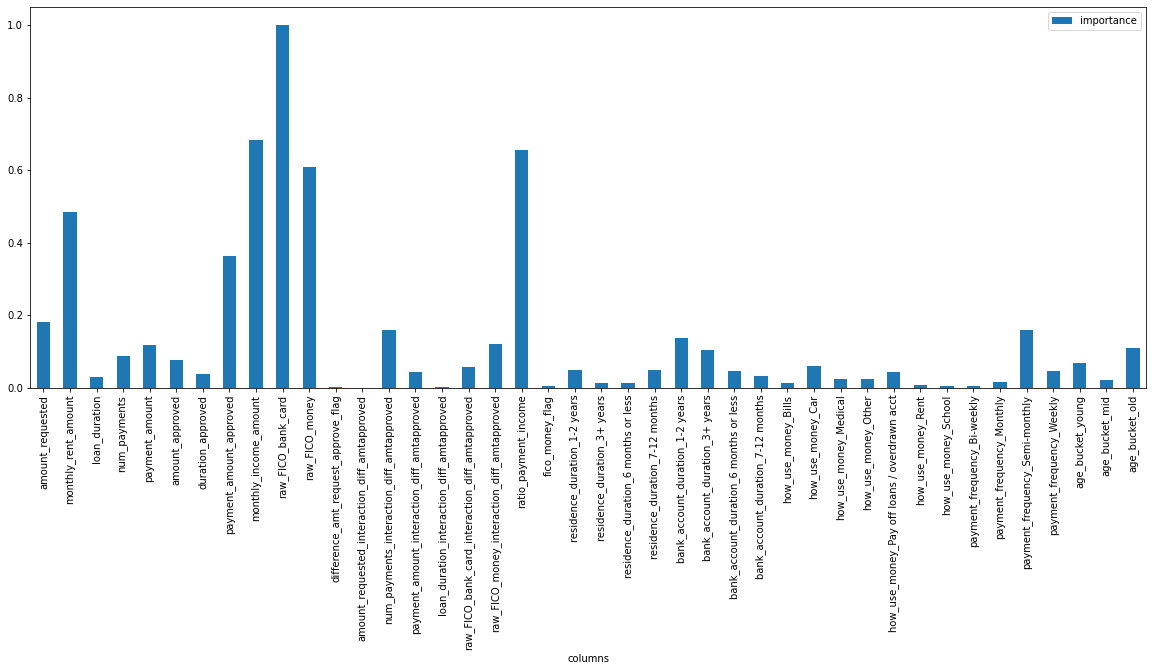

In [58]:
#application_data[~application_data['payment_amount_approved'].isna()]['bank_routing_number'].value_counts().plot(kind='bar')

import matplotlib.pyplot as plt

#plt.figure(figsize=(44, 14))

feature_importance_df.plot(x = 'columns', y = 'importance', kind='bar', figsize=(20, 7))




In [143]:
pd.DataFrame(grid_search_clf.best_estimator_.named_steps['preparation'].transform(x_train).toarray())

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,400.0,640.0,5.0,10.0,73.74,400.0,5.0,73.74,3080.0,672.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,300.0,0.0,5.0,5.0,116.34,300.0,5.0,116.34,753.0,668.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,600.0,0.0,5.0,10.0,110.61,600.0,5.0,110.61,1612.0,700.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,500.0,400.0,5.0,10.0,92.17,500.0,5.0,92.17,600.0,641.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,800.0,825.0,5.0,10.0,147.47,800.0,5.0,147.47,2800.0,645.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,500.0,475.0,5.0,21.0,44.01,500.0,5.0,39.37,2400.0,630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
508,800.0,734.0,5.0,10.0,92.17,500.0,5.0,82.58,2500.0,573.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
509,300.0,500.0,3.0,3.0,170.81,300.0,3.0,170.81,3026.0,661.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
510,800.0,725.0,5.0,10.0,92.17,500.0,5.0,92.17,3400.0,670.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [124]:
x_train

,amount_requested,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,...,payment_amount_interaction_diff_amtapproved,loan_duration_interaction_diff_amtapproved,raw_FICO_telecom_interaction_diff_amtapproved,raw_FICO_retail_interaction_diff_amtapproved,raw_FICO_bank_card_interaction_diff_amtapproved,raw_FICO_money_interaction_diff_amtapproved,fico_money_flag,fico_bankcard_flag,age_bucket,ratio_payment_income
411,400,True,640,True,5,10,73.74,400,5,73.74,...,0.00,0,0,0,0,0,0,0,mid,0.030098
252,300,False,0,False,5,5,116.34,300,5,116.34,...,0.00,0,0,0,0,0,0,0,old,0.152477
431,600,False,0,False,5,10,110.61,600,5,110.61,...,0.00,0,0,0,0,0,0,0,mid,0.068194
434,500,True,400,False,5,10,92.17,500,5,92.17,...,0.00,0,0,0,0,0,0,0,old,0.438905
473,800,True,825,True,5,10,147.47,800,5,147.47,...,0.00,0,0,0,0,0,1,0,mid,0.074292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,500,True,475,False,5,21,44.01,500,5,39.37,...,0.00,0,0,0,0,0,1,0,mid,0.020346
107,800,False,734,True,5,10,92.17,500,5,82.58,...,92.17,5,514,550,573,580,1,1,mid,0.046498
272,300,True,500,True,3,3,170.81,300,3,170.81,...,0.00,0,0,0,0,0,0,0,mid,0.067354
437,800,True,725,True,5,10,92.17,500,5,92.17,...,92.17,5,604,622,670,613,0,0,mid,0.034328


In [123]:
grid_search_clf.best_estimator_.named_steps['preparation']

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['amount_requested',
                                                                                    'monthly_rent_amount',
                                                                                    'loan_duration',
                                                                                    'num_payments',
                                                                                    'payment_amount',
                                                                                    'amount_approved',
                                                                                    'duration_approved',
                                                                                    'payment_amount_approved',
                                                          

In [126]:
x_train.loc[:,cat_attribs]

,residence_duration,bank_account_duration,how_use_money,payment_frequency,fico_money_flag,age_bucket
411,7-12 months,3+ years,Bills,Bi-weekly,0,mid
252,3+ years,3+ years,Bills,Monthly,0,old
431,3+ years,3+ years,Bills,Bi-weekly,0,mid
434,7-12 months,6 months or less,Bills,Bi-weekly,0,old
473,6 months or less,7-12 months,Other,Bi-weekly,1,mid
...,...,...,...,...,...,...
71,3+ years,7-12 months,Other,Weekly,1,mid
107,3+ years,6 months or less,Other,Bi-weekly,1,mid
272,1-2 years,1-2 years,Medical,Monthly,0,mid
437,3+ years,1-2 years,Bills,Bi-weekly,0,mid


# What If Analysis, for Bad loans, need to do Feature Engg for them again after changing features.

In [59]:
y_test

576    1.0
267    1.0
293    1.0
603    1.0
175    1.0
      ... 
421    0.0
29     1.0
592    1.0
136    0.0
440    0.0
Name: Bad, Length: 128, dtype: float64

In [280]:
# y_train_predicted = grid_search_clf.best_estimator_.predict(x_train)
# y_train_probabilities = grid_search_clf.best_estimator_.predict_proba(x_train)

# y_test_predicted = grid_search_clf.best_estimator_.predict(x_test)
# y_test_probabilities = grid_search_clf.best_estimator_.predict_proba(x_test)

In [60]:
#True positives
true_positive_indices = np.where((y_test == y_test_predicted) & (y_test == 1))[0]

In [61]:
y_test

576    1.0
267    1.0
293    1.0
603    1.0
175    1.0
      ... 
421    0.0
29     1.0
592    1.0
136    0.0
440    0.0
Name: Bad, Length: 128, dtype: float64

In [62]:
y_test_predicted[125]

0.0

In [63]:
np.array(y_test)[125]

1.0

In [92]:
x_test.index = range(len(x_test))

In [93]:
y_test.index = range(len(y_test))

In [94]:
x_test_experiment = x_test.loc[true_positive_indices, :]
y_test_experiment = y_test.loc[true_positive_indices]

In [95]:
x_test_experiment.head(5)

,amount_requested,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,...,payment_amount_interaction_diff_amtapproved,loan_duration_interaction_diff_amtapproved,raw_FICO_telecom_interaction_diff_amtapproved,raw_FICO_retail_interaction_diff_amtapproved,raw_FICO_bank_card_interaction_diff_amtapproved,raw_FICO_money_interaction_diff_amtapproved,fico_money_flag,fico_bankcard_flag,age_bucket,ratio_payment_income
1,400,True,350,False,6,6,137.40,400,6,137.40,...,0.0,0,0,0,0,0,0,0,mid,0.048042
2,400,True,250,True,8,13,61.91,400,6,61.91,...,0.0,0,0,0,0,0,1,0,mid,0.064490
4,400,True,100,True,5,10,73.74,400,5,66.07,...,0.0,0,0,0,0,0,1,0,young,0.054603
5,700,True,1395,False,5,10,92.17,500,5,92.17,...,0.0,0,0,0,0,0,0,0,mid,0.019972
9,800,True,675,True,3,6,136.00,500,3,136.00,...,136.0,3,582,609,654,602,0,0,mid,0.058244


In [96]:
#Lets increase their income by 20%, and monthly rent amount by 5%.
x_test_experiment['monthly_income_amount'] = 1.2*x_test_experiment['monthly_income_amount']
x_test_experiment['monthly_rent_amount'] = 0.95*x_test_experiment['monthly_rent_amount']

In [97]:
#Feature engg for some columns

#ratio_payment_income
x_test_experiment['ratio_payment_income'] = x_test_experiment['payment_amount_approved'] / (x_test_experiment['monthly_income_amount'] - 
                                                                                            x_test_experiment['monthly_rent_amount'] + 10)





In [98]:
y_test_experiment_predicted = grid_search_clf.best_estimator_.predict(x_test_experiment)

In [99]:
np.sum(y_test_experiment_predicted) / y_test_experiment_predicted.shape[0]

0.9019607843137255

In [77]:
y_test_experiment_predicted.shape[0]

51

In [78]:
np.sum(y_test_experiment_predicted)

46.0

In [100]:
redemption_index = np.where((y_test_experiment != y_test_experiment_predicted))[0]

In [104]:
x_test_experiment.index = range(len(x_test_experiment))

In [117]:
top_features = list(columns_features[modified_importances.argsort()[::-1][:10]])
x_test_experiment.loc[redemption_index, ['raw_FICO_bank_card', 'monthly_income_amount', 
                                         'ratio_payment_income','raw_FICO_money', 'monthly_rent_amount',
                                        'payment_amount_approved', 'amount_requested', ]]

,raw_FICO_bank_card,monthly_income_amount,ratio_payment_income,raw_FICO_money,monthly_rent_amount,payment_amount_approved,amount_requested
0,692,3840.0,0.039062,622,332.50,137.40,400
11,679,3936.0,0.050834,641,1045.00,147.47,800
12,649,2868.0,0.022727,575,835.05,46.43,300
41,657,3681.6,0.033619,571,950.00,92.17,500
47,680,2746.8,0.051864,615,522.50,115.88,400


In [111]:
top_features

['raw_FICO_bank_card',
 'monthly_income_amount',
 'ratio_payment_income',
 'raw_FICO_money',
 'monthly_rent_amount',
 'payment_amount_approved',
 'amount_requested',
 'num_payments_interaction_diff_amtapproved',
 'payment_frequency_Semi-monthly',
 'bank_account_duration_1-2 years']

In [112]:
x_test_experiment

,amount_requested,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,...,payment_amount_interaction_diff_amtapproved,loan_duration_interaction_diff_amtapproved,raw_FICO_telecom_interaction_diff_amtapproved,raw_FICO_retail_interaction_diff_amtapproved,raw_FICO_bank_card_interaction_diff_amtapproved,raw_FICO_money_interaction_diff_amtapproved,fico_money_flag,fico_bankcard_flag,age_bucket,ratio_payment_income
0,400,True,332.50,False,6,6,137.40,400,6,137.40,...,0.00,0,0,0,0,0,0,0,mid,0.039062
1,400,True,237.50,True,8,13,61.91,400,6,61.91,...,0.00,0,0,0,0,0,1,0,mid,0.051060
2,400,True,95.00,True,5,10,73.74,400,5,66.07,...,0.00,0,0,0,0,0,1,0,young,0.044793
3,700,True,1325.25,False,5,10,92.17,500,5,92.17,...,0.00,0,0,0,0,0,0,0,mid,0.015663
4,800,True,641.25,True,3,6,136.00,500,3,136.00,...,136.00,3,582,609,654,602,0,0,mid,0.045811
5,400,False,475.00,True,4,8,86.79,400,4,86.79,...,0.00,0,0,0,0,0,1,0,mid,0.057745
6,800,False,870.20,True,5,10,92.17,500,5,92.17,...,92.17,5,551,553,679,600,0,0,mid,0.016614
7,500,True,807.50,True,5,10,92.17,500,5,82.58,...,0.00,0,0,0,0,0,1,0,mid,0.055703
8,700,True,665.00,True,6,13,77.39,500,6,77.39,...,0.00,0,0,0,0,0,0,0,mid,0.009274
9,800,True,308.75,True,8,12,84.03,500,6,84.03,...,84.03,8,533,545,639,601,0,0,mid,0.028864
